<a href="https://colab.research.google.com/github/U-Aravindhakumar/FIFA-World-Cup-Analysis/blob/main/FIFA_World_Cup_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA World Cup Analysis


### Load the Libraries and Data

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import warnings
import plotly as py
import plotly.tools as tls
import cufflinks as cf
from PIL import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [356]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
def show_dtypes(x):
    for col in x.columns:
        print(color.BOLD +col+ color.END,"::",x[col].dtypes)

In [357]:
def Tabulation(x):
    table = pd.DataFrame(x.dtypes,columns=['dtypes'])
    table1 =pd.DataFrame(x.columns,columns=['Names'])
    table = table.reset_index()
    table= table.rename(columns={'index':'Name'})
    table['No of Missing'] = x.isnull().sum().values
    table['No of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isnull().sum().values)/ (x.shape[0])) *100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True), base=2),2)
    return table


In [358]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print("Total Unique  " + color.BOLD +col+ color.END + "  values in Train Data {}".format(x[col].nunique()))

## Analyze the WorldCup Matches Data set :


### Read the Data

In [359]:
df_Matches = pd.read_csv("/content/drive/MyDrive/WorldCupMatches.csv")

Displaying the top 5 rows of the dataframe(Matches)

In [360]:
display(df_Matches.head())

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   
3                     2549.0                   1.0                   0.0   
4                    23409.0                   0.0                   0.0   

                  Referee               Assistant 1  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3   WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4     REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   

                  Assistant 2  RoundID  MatchID Home Team Initials  \
0         REGO Gilberto (BRA)    201.0   1096.0                FRA   
1       WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2         BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3    MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4  RADULESCU Constantin (ROU)    201.0   1085.0                ARG   

  Away Team Initials  
0                MEX  
1                BEL  
2                BRA  
3                PER  
4                FRA

Displaying the statistical information for the dataframe

In [361]:
display(df_Matches.describe())

Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000              0.000000  2.010000e+02  2.500000e+01  
25%                0.000000              0.000000  2.620000e+02  1.188750e+03  
50%                0.000000              0.000000  3.370000e+02  2.191000e+03  
75%                1.000000              1.000000  2.497220e+05  4.395006e+07  
max                6.000000              5.000000  9.741060e+07  3.001865e+08

### Data Cleaning

Displaying the information of the dataframe

In [362]:
display(df_Matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

None

Displaying the dimention of the dataframe

In [363]:
display (df_Matches.shape)

(4572, 20)

Checking if i have some null values

In [364]:
df_Matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

**Observation:**

*   This shows that all columns have the same number of null values, It's means that maybe they start at the same index and end at the same index. but, I have to delete all of them




Check valied or NaN

In [365]:
df_Matches.last_valid_index()

851

**Observation**
*   This means that from the row 852, all values are NaN.




Let it check that...

In [366]:
df_Matches[850:860]

Year              Datetime                     Stage  \
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   
852     NaN                   NaN                       NaN   
853     NaN                   NaN                       NaN   
854     NaN                   NaN                       NaN   
855     NaN                   NaN                       NaN   
856     NaN                   NaN                       NaN   
857     NaN                   NaN                       NaN   
858     NaN                   NaN                       NaN   
859     NaN                   NaN                       NaN   

                 Stadium             City Home Team Name  Home Team Goals  \
850     Estadio Nacional        Brasilia          Brazil              0.0   
851  Estadio do Maracana  Rio De Janeiro         Germany              1.0   
852                  NaN              NaN            NaN              NaN   
853                  NaN              NaN            NaN              NaN   
854                  NaN              NaN            NaN              NaN   
855                  NaN              NaN            NaN              NaN   
856                  NaN              NaN            NaN              NaN   
857                  NaN              NaN            NaN              NaN   
858                  NaN              NaN            NaN              NaN   
859                  NaN              NaN            NaN              NaN   

     Away Team Goals Away Team Name                 Win conditions  \
850              3.0    Netherlands                                  
851              0.0      Argentina  Germany win after extra time    
852              NaN            NaN                            NaN   
853              NaN            NaN                            NaN   
854              NaN            NaN                            NaN   
855              NaN            NaN                            NaN   
856              NaN            NaN                            NaN   
857              NaN            NaN                            NaN   
858              NaN            NaN                            NaN   
859              NaN            NaN                            NaN   

     Attendance  Half-time Home Goals  Half-time Away Goals  \
850     68034.0                   0.0                   2.0   
851     74738.0                   0.0                   0.0   
852         NaN                   NaN                   NaN   
853         NaN                   NaN                   NaN   
854         NaN                   NaN                   NaN   
855         NaN                   NaN                   NaN   
856         NaN                   NaN                   NaN   
857         NaN                   NaN                   NaN   
858         NaN                   NaN                   NaN   
859         NaN                   NaN                   NaN   

                   Referee            Assistant 1              Assistant 2  \
850  HAIMOUDI Djamel (ALG)   ACHIK Redouane (MAR)  ETCHIALI Abdelhak (ALG)   
851   Nicola RIZZOLI (ITA)  Renato FAVERANI (ITA)     Andrea STEFANI (ITA)   
852                    NaN                    NaN                      NaN   
853                    NaN                    NaN                      NaN   
854                    NaN                    NaN                      NaN   
855                    NaN                    NaN                      NaN   
856                    NaN                    NaN                      NaN   
857                    NaN                    NaN                      NaN   
858                    NaN                    NaN                      NaN   
859                    NaN                    NaN                      NaN   

      RoundID      MatchID Home Team Initials Away Team Initials  
850  255957.0  300186502.0                BRA                NED  
851  25

Dropping all the null values then rechecking for the null values

In [367]:
df_Matches = df_Matches.dropna()
df_Matches.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

**Observation**

*  we can see there are zero null values in the wc matchces dataset




Now i am going to check if there is some data redundance, then delete them if exist to make sure that no duplicates in my Matches datasets.

In [368]:
df_Matches_dup = df_Matches[df_Matches.duplicated(keep = "last")]
df_Matches_dup

Year              Datetime                     Stage  \
820  2014.0  28 Jun 2014 - 13:00                Round of 16   
821  2014.0  28 Jun 2014 - 17:00                Round of 16   
822  2014.0  30 Jun 2014 - 13:00                Round of 16   
824  2014.0  04 Jul 2014 - 17:00             Quarter-finals   
825  2014.0  04 Jul 2014 - 13:00             Quarter-finals   
826  2014.0  08 Jul 2014 - 17:00                Semi-finals   
827  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
828  2014.0  13 Jul 2014 - 16:00                      Final   
829  2014.0  09 Jul 2014 - 17:00                Semi-finals   
830  2014.0  05 Jul 2014 - 17:00             Quarter-finals   
831  2014.0  05 Jul 2014 - 13:00             Quarter-finals   
832  2014.0  29 Jun 2014 - 13:00                Round of 16   
833  2014.0  29 Jun 2014 - 17:00                Round of 16   
834  2014.0  01 Jul 2014 - 13:00                Round of 16   
835  2014.0  01 Jul 2014 - 17:00                Round of 16   

                 Stadium             City Home Team Name  Home Team Goals  \
820     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
821  Estadio do Maracana  Rio De Janeiro        Colombia              2.0   
822     Estadio Nacional        Brasilia          France              2.0   
824     Estadio Castelao       Fortaleza          Brazil              2.0   
825  Estadio do Maracana  Rio De Janeiro          France              0.0   
826     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
827     Estadio Nacional        Brasilia          Brazil              0.0   
828  Estadio do Maracana  Rio De Janeiro         Germany              1.0   
829   Arena de Sao Paulo       Sao Paulo     Netherlands              0.0   
830     Arena Fonte Nova        Salvador     Netherlands              0.0   
831     Estadio Nacional        Brasilia       Argentina              1.0   
832     Estadio Castelao       Fortaleza     Netherlands              2.0   
833     Arena Pernambuco          Recife      Costa Rica              1.0   
834   Arena de Sao Paulo       Sao Paulo       Argentina              1.0   
835     Arena Fonte Nova        Salvador         Belgium              2.0   

     Away Team Goals Away Team Name                         Win conditions  \
820              1.0          Chile       Brazil win on penalties (3 - 2)    
821              0.0        Uruguay                                          
822              0.0        Nigeria                                          
824              1.0       Colombia                                          
825              1.0        Germany                                          
826              7.0        Germany                                          
827              3.0    Netherlands                                          
828              0.0      Argentina          Germany win after extra time    
829              0.0      Argentina    Argentina win on penalties (2 - 4)    
830              0.0     Costa Rica  Netherlands win on penalties (4 - 3)    
831              0.0        Belgium                                          
832              1.0         Mexico                                          
833              1.0         Greece   Costa Rica win on penalties (5 - 3)    
834              0.0    Switzerland        Argentina win after extra time    
835              1.0            USA          Belgium win after extra time    

     Attendance  Half-time Home Goals  Half-time Away Goals  \
820     57714.0                   0.0                   0.0   
821     73804.0                   1.0                   0.0   
822     67882.0                   0.0                   0.0   
824     60342.0                   1.0                   0.0   
825     74240.0                   0.0                   1.0   
826     58141.0                   0.0                   5.0   
827     68034.0                   0.0                   2.0   
828     7473

In [369]:
df_Matches_dup1 = df_Matches[df_Matches.duplicated(keep = "first" )]
df_Matches_dup1

Year              Datetime                     Stage  \
836  2014.0  28 Jun 2014 - 13:00                Round of 16   
837  2014.0  28 Jun 2014 - 17:00                Round of 16   
838  2014.0  29 Jun 2014 - 13:00                Round of 16   
839  2014.0  29 Jun 2014 - 17:00                Round of 16   
840  2014.0  30 Jun 2014 - 13:00                Round of 16   
842  2014.0  01 Jul 2014 - 13:00                Round of 16   
843  2014.0  01 Jul 2014 - 17:00                Round of 16   
844  2014.0  04 Jul 2014 - 13:00             Quarter-finals   
845  2014.0  04 Jul 2014 - 17:00             Quarter-finals   
846  2014.0  05 Jul 2014 - 13:00             Quarter-finals   
847  2014.0  05 Jul 2014 - 17:00             Quarter-finals   
848  2014.0  08 Jul 2014 - 17:00                Semi-finals   
849  2014.0  09 Jul 2014 - 17:00                Semi-finals   
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
836     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
837  Estadio do Maracana  Rio De Janeiro        Colombia              2.0   
838     Estadio Castelao       Fortaleza     Netherlands              2.0   
839     Arena Pernambuco          Recife      Costa Rica              1.0   
840     Estadio Nacional        Brasilia          France              2.0   
842   Arena de Sao Paulo       Sao Paulo       Argentina              1.0   
843     Arena Fonte Nova        Salvador         Belgium              2.0   
844  Estadio do Maracana  Rio De Janeiro          France              0.0   
845     Estadio Castelao       Fortaleza          Brazil              2.0   
846     Estadio Nacional        Brasilia       Argentina              1.0   
847     Arena Fonte Nova        Salvador     Netherlands              0.0   
848     Estadio Mineirao  Belo Horizonte          Brazil              1.0   
849   Arena de Sao Paulo       Sao Paulo     Netherlands              0.0   
850     Estadio Nacional        Brasilia          Brazil              0.0   
851  Estadio do Maracana  Rio De Janeiro         Germany              1.0   

     Away Team Goals Away Team Name                         Win conditions  \
836              1.0          Chile       Brazil win on penalties (3 - 2)    
837              0.0        Uruguay                                          
838              1.0         Mexico                                          
839              1.0         Greece   Costa Rica win on penalties (5 - 3)    
840              0.0        Nigeria                                          
842              0.0    Switzerland        Argentina win after extra time    
843              1.0            USA          Belgium win after extra time    
844              1.0        Germany                                          
845              1.0       Colombia                                          
846              0.0        Belgium                                          
847              0.0     Costa Rica  Netherlands win on penalties (4 - 3)    
848              7.0        Germany                                          
849              0.0      Argentina    Argentina win on penalties (2 - 4)    
850              3.0    Netherlands                                          
851              0.0      Argentina          Germany win after extra time    

     Attendance  Half-time Home Goals  Half-time Away Goals  \
836     57714.0                   0.0                   0.0   
837     73804.0                   1.0                   0.0   
838     58817.0                   0.0                   0.0   
839     41242.0                   0.0                   0.0   
840     67882.0                   0.0                   0.0   
842     63255.0                   0.0                   0.0   
843     51227.0                   0.0                   0.0   
844     7424

 Shape of duplicate values

In [370]:
df_Matches_dup.shape

(15, 20)

**Observation**

*  This shows that i have 15 rows duplicates data, so i have to remove them.




In [371]:
df_Matches = df_Matches.drop_duplicates()

In [372]:
display(df_Matches.shape)

(835, 20)

Now World Cup Matches dataset does not contain any null and duplicate values.


### Data Analysis

Showing all the available columns in the Matches dataset

In [373]:
df_Matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

Displaying data types in {Matches} data set

In [374]:
print("Dtypes of Matches \n ")
display(show_dtypes(df_Matches))

Dtypes of Matches 
 
Year :: float64
Datetime :: object
Stage :: object
Stadium :: object
City :: object
Home Team Name :: object
Home Team Goals :: float64
Away Team Goals :: float64
Away Team Name :: object
Win conditions :: object
Attendance :: float64
Half-time Home Goals :: float64
Half-time Away Goals :: float64
Referee :: object
Assistant 1 :: object
Assistant 2 :: object
RoundID :: float64
MatchID :: float64
Home Team Initials :: object
Away Team Initials :: object


None

In [375]:
Tabulation(df_Matches)

Name   dtypes  No of Missing  No of Uniques  \
0                   Year  float64              0             20   
1               Datetime   object              0            601   
2                  Stage   object              0             23   
3                Stadium   object              0            181   
4                   City   object              0            151   
5         Home Team Name   object              0             78   
6        Home Team Goals  float64              0             11   
7        Away Team Goals  float64              0              7   
8         Away Team Name   object              0             83   
9         Win conditions   object              0             43   
10            Attendance  float64              0            622   
11  Half-time Home Goals  float64              0              7   
12  Half-time Away Goals  float64              0              6   
13               Referee   object              0            366   
14           Assistant 1   object              0            387   
15           Assistant 2   object              0            408   
16               RoundID  float64              0            101   
17               MatchID  float64              0            835   
18    Home Team Initials   object              0             77   
19    Away Team Initials   object              0             82   

    Percent of Missing       First Observation        Second Observation  \
0                  0.0                  1930.0                    1930.0   
1                  0.0    13 Jul 1930 - 15:00       13 Jul 1930 - 15:00    
2                  0.0                 Group 1                   Group 4   
3                  0.0                 Pocitos            Parque Central   
4                  0.0             Montevideo                Montevideo    
5                  0.0                  France                       USA   
6                  0.0                     4.0                       3.0   
7                  0.0                     1.0                       0.0   
8                  0.0                  Mexico                   Belgium   
9                  0.0                                                     
10                 0.0                  4444.0                   18346.0   
11                 0.0                     3.0                       2.0   
12                 0.0                     0.0                       0.0   
13                 0.0  LOMBARDI Domingo (URU)         MACIAS Jose (ARG)   
14                 0.0   CRISTOPHE Henry (BEL)  MATEUCCI Francisco (URU)   
15                 0.0     REGO Gilberto (BRA)     WARNKEN Alberto (CHI)   
16                 0.0                   201.0                     201.0   
17                 0.0                  1096.0                    1090.0   
18                 0.0                     FRA                       USA   
19                 0.0                     MEX                       BEL   

          Third Observation  Entropy  
0                    1930.0     4.20  
1      14 Jul 1930 - 12:45      9.03  
2                   Group 2     4.19  
3            Parque Central     7.30  
4               Montevideo      6.99  
5                Yugoslavia     5.39  
6                       2.0     2.51  
7                       1.0     1.92  
8                    Brazil     5.90  
9                               0.70  
10                  24059.0     8.95  
11                      2.0     1.66  
12                      0.0     1.22  
13      TEJADA Anibal (URU)     8.22  
14  VALLARINO Ricardo (URU)     8.39  
15      BALWAY Thomas (FRA)     8.46  
16                    201.0     5.51  
17                   1093.0     9.71  
18                      YUG     5.38  
19                      BRA     5.89

In [376]:
show_unique(df_Matches)

Total Unique  Year  values in Train Data 20
Total Unique  Datetime  values in Train Data 601
Total Unique  Stage  values in Train Data 23
Total Unique  Stadium  values in Train Data 181
Total Unique  City  values in Train Data 151
Total Unique  Home Team Name  values in Train Data 78
Total Unique  Home Team Goals  values in Train Data 11
Total Unique  Away Team Goals  values in Train Data 7
Total Unique  Away Team Name  values in Train Data 83
Total Unique  Win conditions  values in Train Data 43
Total Unique  Attendance  values in Train Data 622
Total Unique  Half-time Home Goals  values in Train Data 7
Total Unique  Half-time Away Goals  values in Train Data 6
Total Unique  Referee  values in Train Data 366
Total Unique  Assistant 1  values in Train Data 387
Total Unique  Assistant 2  values in Train Data 408
Total Unique  RoundID  values in Train Data 101
Total Unique  MatchID  values in Train Data 835
Total Unique  Home Team Initials  values in Train Data 77
Total Unique  Away Team

## Analyze the WorldCup Players Data set

###read the Data

In [377]:
df_Players = pd.read_csv('/content/drive/MyDrive/WorldCupPlayers.csv')

Displaying the top 5 rows of the dataframe( Players )

In [378]:
display(df_Players.head())

RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN

Displaying the statistical information for the dataframe

In [379]:
display(df_Players.describe())

RoundID       MatchID  Shirt Number
count  3.778400e+04  3.778400e+04  37784.000000
mean   1.105647e+07  6.362233e+07     10.726022
std    2.770144e+07  1.123916e+08      6.960138
min    2.010000e+02  2.500000e+01      0.000000
25%    2.630000e+02  1.199000e+03      5.000000
50%    3.370000e+02  2.216000e+03     11.000000
75%    2.559310e+05  9.741000e+07     17.000000
max    9.741060e+07  3.001865e+08     23.000000

Displaying the information of the dataframe

### Data Cleaning

In [380]:
display(df_Players.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None

Displaying the dimentions of data frames(PLAYERS)

In [381]:
display (df_Players.shape)

(37784, 9)

Checking if the dataset have some null values

In [382]:
df_Players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

 Dropping all the null values

In [383]:
df_Players = df_Players.dropna()

Now i am going to check if there is some data redundance, then delete them if exist to make sure that no duplicates in my Players datasets.

In [384]:
df_Players_dup = df_Players[df_Players.duplicated(keep = "last")]
df_Players_dup

RoundID    MatchID Team Initials                 Coach Name Line-up  \
36407   255951  300186462           NGA        KESHI Stephen (NGA)       S   
36457   255951  300186460           ALG    HALILHODZIC Vahid (BIH)       S   
36460   255951  300186460           GER         LOEW Joachim (GER)       S   
36496   255953  300186461           BRA  SCOLARI Luiz Felipe (BRA)       S   
36498   255953  300186461           BRA  SCOLARI Luiz Felipe (BRA)       S   
36501   255953  300186461           COL        PEKERMAN Jose (ARG)       S   
36635   255957  300186502           NED       Louis VAN GAAL (NED)       S   
36636   255957  300186502           BRA  SCOLARI Luiz Felipe (BRA)       S   
36647   255957  300186502           NED       Louis VAN GAAL (NED)       S   
36657   255957  300186502           NED       Louis VAN GAAL (NED)       N   
36738   255955  300186490           NED       Louis VAN GAAL (NED)       S   
36772   255953  300186488           NED       Louis VAN GAAL (NED)       S   
36796   255953  300186488           NED       Louis VAN GAAL (NED)       N   
36871   255951  300186508           MEX       HERRERA Miguel (MEX)       S   
36874   255951  300186508           NED       Louis VAN GAAL (NED)       S   
36910   255951  300186459           CRC     PINTO Jorge Luis (COL)       S   
36924   255951  300186459           CRC     PINTO Jorge Luis (COL)       S   
37006   255951  300186497           BEL         WILMOTS Marc (BEL)       S   

       Shirt Number  Player Name Position      Event  
36407             2         YOBO        C       W90'  
36457             5     HALLICHE        C  Y42' O97'  
36460            16         LAHM        C      Y107'  
36496            12  JULIO CESAR       GK       Y78'  
36498             3      T SILVA        C   G7' Y64'  
36501             3        YEPES        C       Y69'  
36635             1    CILLESSEN       GK       O90'  
36636             3      T SILVA        C        Y2'  
36647             9    V. PERSIE        C        P3'  
36657            22         VORM       GK       I90'  
36738             9    V. PERSIE        C       O96'  
36772             1    CILLESSEN       GK      O120'  
36796            23         KRUL       GK      I120'  
36871             4   R. MARQUEZ        C       Y90'  
36874             9    V. PERSIE        C       O76'  
36910             1     NAVAS K.       GK       Y90'  
36924            10      RUIZ B.        C  G52' Y70'  
37006             4      KOMPANY        C       Y42'

In [385]:
df_Players_dup1 = df_Players[df_Players.duplicated(keep = "first")]
df_Players_dup1

RoundID    MatchID Team Initials                 Coach Name Line-up  \
37147   255951  300186508           MEX       HERRERA Miguel (MEX)       S   
37150   255951  300186508           NED       Louis VAN GAAL (NED)       S   
37186   255951  300186459           CRC     PINTO Jorge Luis (COL)       S   
37200   255951  300186459           CRC     PINTO Jorge Luis (COL)       S   
37235   255951  300186462           NGA        KESHI Stephen (NGA)       S   
37285   255951  300186460           ALG    HALILHODZIC Vahid (BIH)       S   
37288   255951  300186460           GER         LOEW Joachim (GER)       S   
37374   255951  300186497           BEL         WILMOTS Marc (BEL)       S   
37462   255953  300186461           BRA  SCOLARI Luiz Felipe (BRA)       S   
37464   255953  300186461           BRA  SCOLARI Luiz Felipe (BRA)       S   
37467   255953  300186461           COL        PEKERMAN Jose (ARG)       S   
37554   255953  300186488           NED       Louis VAN GAAL (NED)       S   
37578   255953  300186488           NED       Louis VAN GAAL (NED)       N   
37658   255955  300186490           NED       Louis VAN GAAL (NED)       S   
37693   255957  300186502           NED       Louis VAN GAAL (NED)       S   
37694   255957  300186502           BRA  SCOLARI Luiz Felipe (BRA)       S   
37705   255957  300186502           NED       Louis VAN GAAL (NED)       S   
37715   255957  300186502           NED       Louis VAN GAAL (NED)       N   

       Shirt Number  Player Name Position      Event  
37147             4   R. MARQUEZ        C       Y90'  
37150             9    V. PERSIE        C       O76'  
37186             1     NAVAS K.       GK       Y90'  
37200            10      RUIZ B.        C  G52' Y70'  
37235             2         YOBO        C       W90'  
37285             5     HALLICHE        C  Y42' O97'  
37288            16         LAHM        C      Y107'  
37374             4      KOMPANY        C       Y42'  
37462            12  JULIO CESAR       GK       Y78'  
37464             3      T SILVA        C   G7' Y64'  
37467             3        YEPES        C       Y69'  
37554             1    CILLESSEN       GK      O120'  
37578            23         KRUL       GK      I120'  
37658             9    V. PERSIE        C       O96'  
37693             1    CILLESSEN       GK       O90'  
37694             3      T SILVA        C        Y2'  
37705             9    V. PERSIE        C        P3'  
37715            22         VORM       GK       I90'

Shape of duplicate values in Players dataset


In [386]:
df_Players_dup.shape

(18, 9)




*   This shows that i have 18 rows duplicates data, so i have to remove them.



Removing duplicate values

In [387]:
df_Players = df_Players.drop_duplicates()

Displaying the dimentions of data frames(PLAYERS) after dropping null and duplicate values

In [388]:
display (df_Players.shape)

(555, 9)

### Data Analysis

**Displaying data types in {Players} data set**

In [389]:
print("Dtypes of Players")
display(show_dtypes(df_Players))

Dtypes of Players
RoundID :: int64
MatchID :: int64
Team Initials :: object
Coach Name :: object
Line-up :: object
Shirt Number :: int64
Player Name :: object
Position :: object
Event :: object


None

In [390]:
show_unique(df_Players)

Total Unique  RoundID  values in Train Data 81
Total Unique  MatchID  values in Train Data 423
Total Unique  Team Initials  values in Train Data 76
Total Unique  Coach Name  values in Train Data 225
Total Unique  Line-up  values in Train Data 2
Total Unique  Shirt Number  values in Train Data 24
Total Unique  Player Name  values in Train Data 347
Total Unique  Position  values in Train Data 3
Total Unique  Event  values in Train Data 311


## Analyze the Worldcup data set

### Read the data

In [391]:
df_Cups = pd.read_csv('/content/drive/MyDrive/WorldCups.csv')

Displaying the top 5 rows of the dataframe ( Cups )


In [392]:
display(df_Cups.head())

Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607

Displaying the statistical information for the dataframe

In [393]:
display(df_Cups.describe())

Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20.000000       20.000000      20.000000
mean   1974.800000   118.950000       21.250000      41.800000
std      25.582889    32.972836        7.268352      17.218717
min    1930.000000    70.000000       13.000000      17.000000
25%    1957.000000    89.000000       16.000000      30.500000
50%    1976.000000   120.500000       16.000000      38.000000
75%    1995.000000   145.250000       26.000000      55.000000
max    2014.000000   171.000000       32.000000      64.000000

Displaying the information of the dataframe

In [394]:
display(df_Cups.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


None

Displaying the dimentions of data frames(Cups)

In [395]:
display(df_Cups.shape)

(20, 10)

Checking for the null values in Cups dataset

In [396]:
df_Cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64



*   It's shows WorldCups dataset does't have any null values




**Displaying data types in {Cups} data set**

In [397]:
print("Dtypes of Cups")
display(show_dtypes(df_Cups))

Dtypes of Cups
Year :: int64
Country :: object
Winner :: object
Runners-Up :: object
Third :: object
Fourth :: object
GoalsScored :: int64
QualifiedTeams :: int64
MatchesPlayed :: int64
Attendance :: object


None

In [398]:
Tabulation(df_Cups)

Name  dtypes  No of Missing  No of Uniques  Percent of Missing  \
0            Year   int64              0             20                 0.0   
1         Country  object              0             15                 0.0   
2          Winner  object              0              9                 0.0   
3      Runners-Up  object              0             10                 0.0   
4           Third  object              0             14                 0.0   
5          Fourth  object              0             16                 0.0   
6     GoalsScored   int64              0             17                 0.0   
7  QualifiedTeams   int64              0              5                 0.0   
8   MatchesPlayed   int64              0              9                 0.0   
9      Attendance  object              0             20                 0.0   

  First Observation Second Observation Third Observation  Entropy  
0              1930               1934              1938     4.32  
1           Uruguay              Italy            France     3.82  
2           Uruguay              Italy             Italy     2.90  
3         Argentina     Czechoslovakia           Hungary     3.21  
4               USA            Germany            Brazil     3.68  
5        Yugoslavia            Austria            Sweden     3.88  
6                70                 70                84     4.02  
7                13                 16                15     2.04  
8                18                 17                18     2.90  
9           590.549            363.000           375.700     4.32

In [399]:
show_unique(df_Cups)

Total Unique  Year  values in Train Data 20
Total Unique  Country  values in Train Data 15
Total Unique  Winner  values in Train Data 9
Total Unique  Runners-Up  values in Train Data 10
Total Unique  Third  values in Train Data 14
Total Unique  Fourth  values in Train Data 16
Total Unique  GoalsScored  values in Train Data 17
Total Unique  QualifiedTeams  values in Train Data 5
Total Unique  MatchesPlayed  values in Train Data 9
Total Unique  Attendance  values in Train Data 20


## Data Visualization

**Attendance In Every World Cup Year**

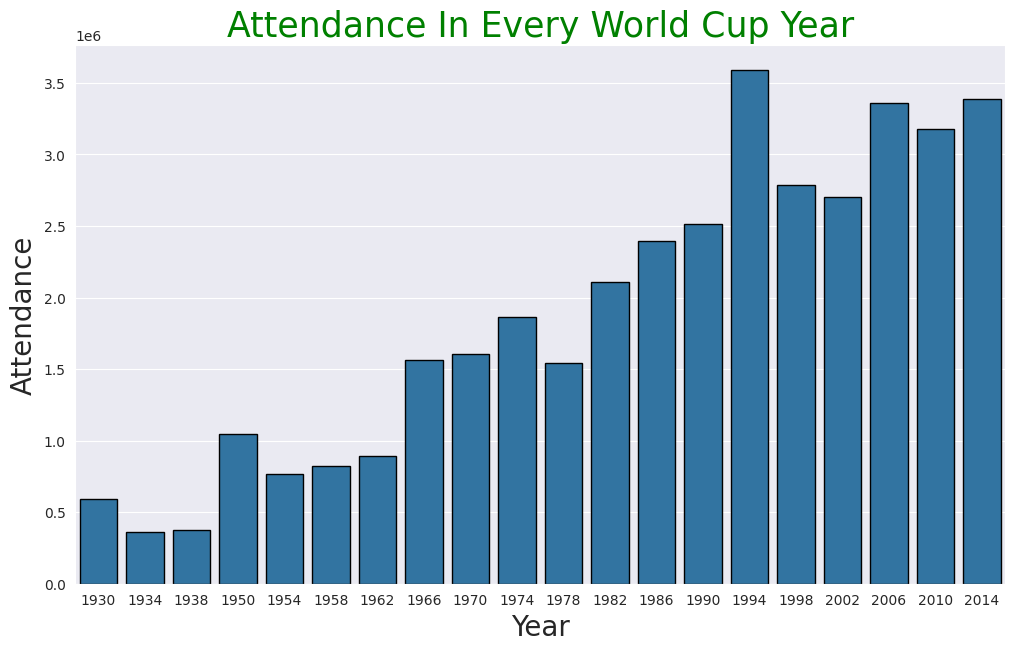

In [400]:
def Attendence_by_year_bar_plot(x):
    matches = x.drop_duplicates(subset="MatchID", keep="first")
    matches = matches[matches["Year"].notnull()]
    att = matches.groupby("Year")["Attendance"].sum().reset_index()
    att["Year"] = att["Year"].astype(int)
    plt.figure(figsize=(12, 7))
    sns.barplot(x="Year", y="Attendance", data=att, linewidth=1, edgecolor=["k"] * len(att))
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Attendance", fontsize=20)
    plt.title("Attendance In Every World Cup Year", fontsize=25, color="green")
    plt.show()
Attendence_by_year_bar_plot(df_Matches)

**Average Attendance In Every World Cup year**

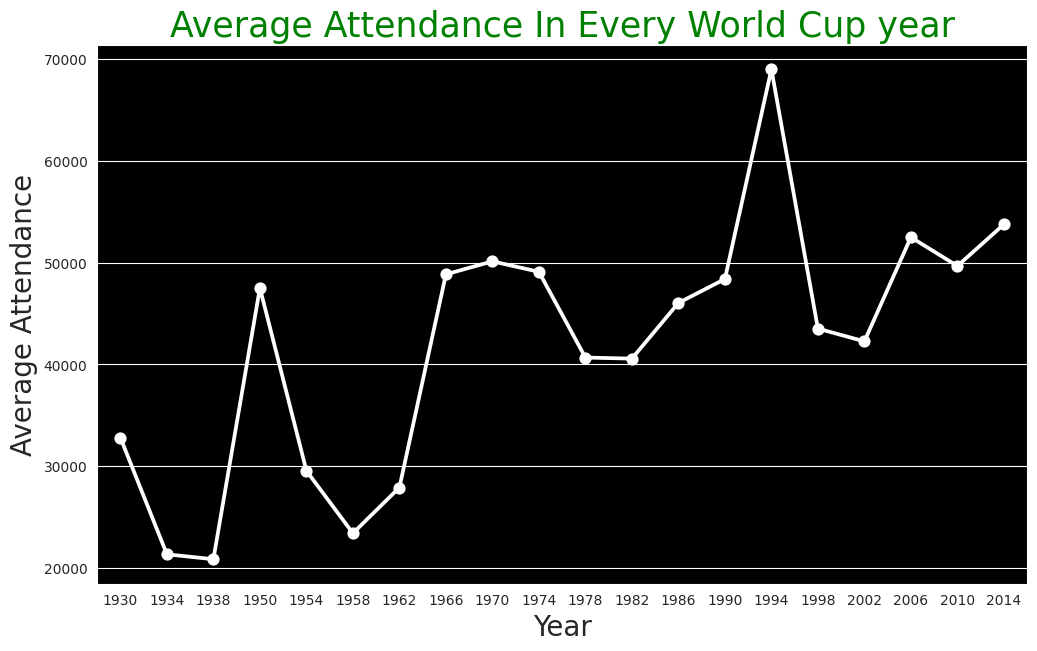

In [401]:
def Average_Attendance_by_year(x):
    matches = x.drop_duplicates(subset="MatchID", keep="first")
    matches = matches[matches["Year"].notnull()]
    att1 = matches.groupby("Year")["Attendance"].mean().reset_index()
    att1["Year"] = att1["Year"].astype(int)
    plt.figure(figsize=(12, 7))
    ax = sns.pointplot(x=att1["Year"], y=att1["Attendance"], color="w")
    ax.set_facecolor("k")
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Average Attendance", fontsize=20)
    plt.title("Average Attendance In Every World Cup year", fontsize=25, color="green")
    plt.show()
Average_Attendance_by_year(df_Matches)

**Total goals scored by year**

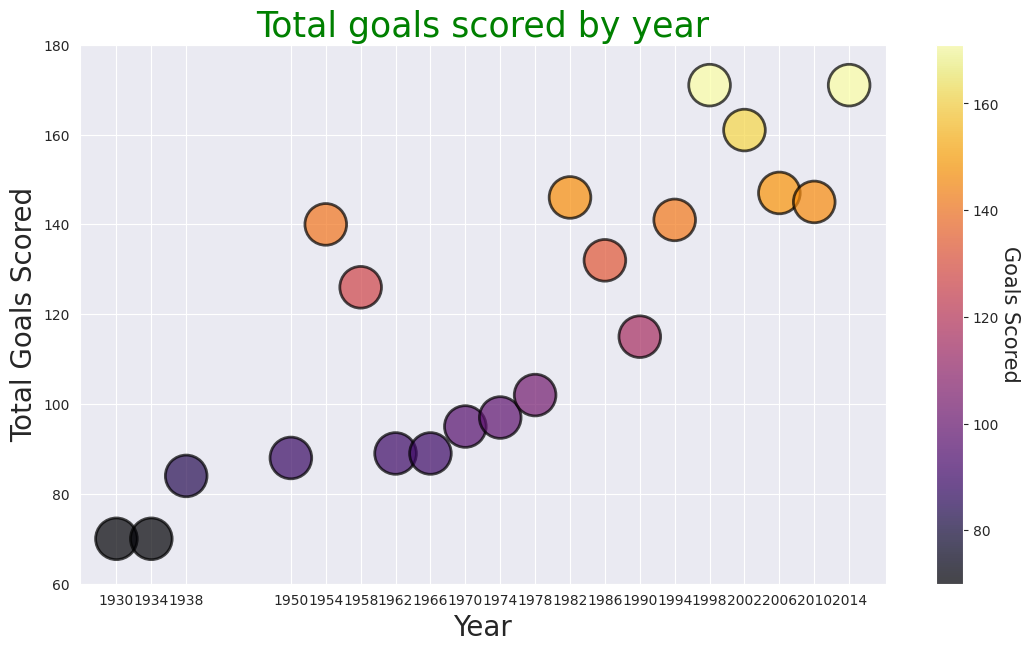

In [402]:
def Total_Goals_Scored_by_year(x):
    plt.figure(figsize=(13, 7))
    df_Cups["Year1"] = df_Cups["Year"].astype(str)
    goals_by_year = x.groupby("Year")["GoalsScored"].sum().reset_index()
    scatter_plot = plt.scatter(
        x="Year",
        y="GoalsScored",
        data=goals_by_year,
        c=goals_by_year["GoalsScored"],
        cmap="inferno",
        s=900,
        alpha=0.7,
        linewidth=2,
        edgecolor="k"
    )
    plt.xticks(goals_by_year["Year"].unique())
    plt.yticks(np.arange(60, 200, 20))
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Total Goals Scored", fontsize=20)
    plt.title('Total goals scored by year', fontsize=25, color="green")
    cbar = plt.colorbar(scatter_plot)
    cbar.set_label('Goals Scored', rotation=270, labelpad=15, fontsize=15)
    plt.show()
Total_Goals_Scored_by_year(df_Cups)

**Qualified Teams and Matches Played by Year**

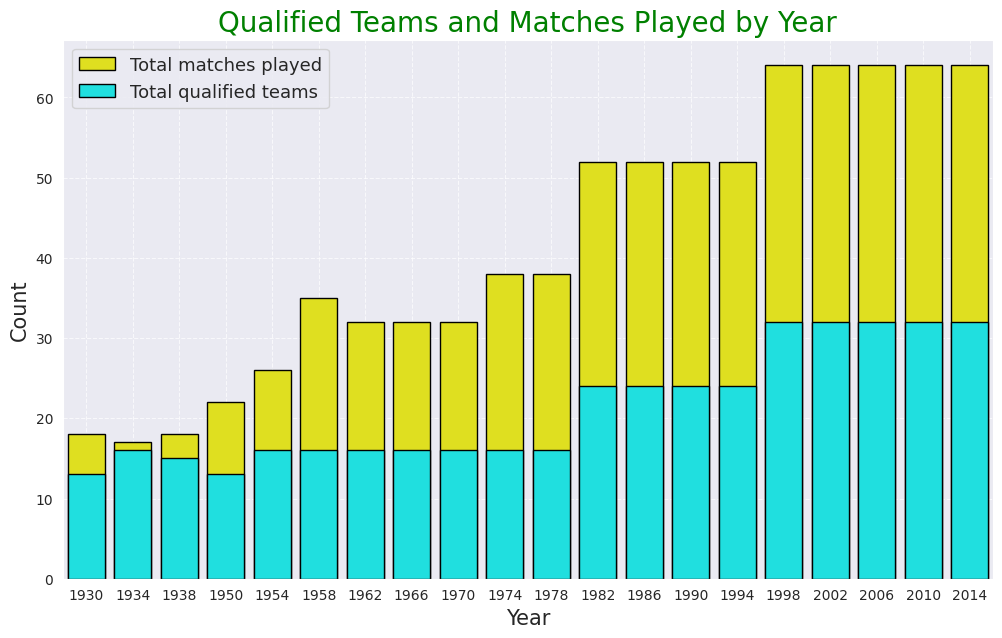

In [403]:
def Qualifies_Teams(x):
    plt.figure(figsize=(12, 7))
    sns.barplot(x="Year", y="MatchesPlayed", data=x,
                linewidth=1, edgecolor="k", color="yellow", label="Total matches played")
    sns.barplot(x="Year", y="QualifiedTeams", data=x,
                linewidth=1, edgecolor="k", color="cyan", label="Total qualified teams")
    plt.legend(loc="best", prop={"size": 13})
    plt.title("Qualified Teams and Matches Played by Year", fontsize=20, color="green")
    plt.xlabel("Year", fontsize=15)
    plt.ylabel("Count", fontsize=15)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
Qualifies_Teams(df_Cups)

**Highest Attendance in a Match of World Cup History**

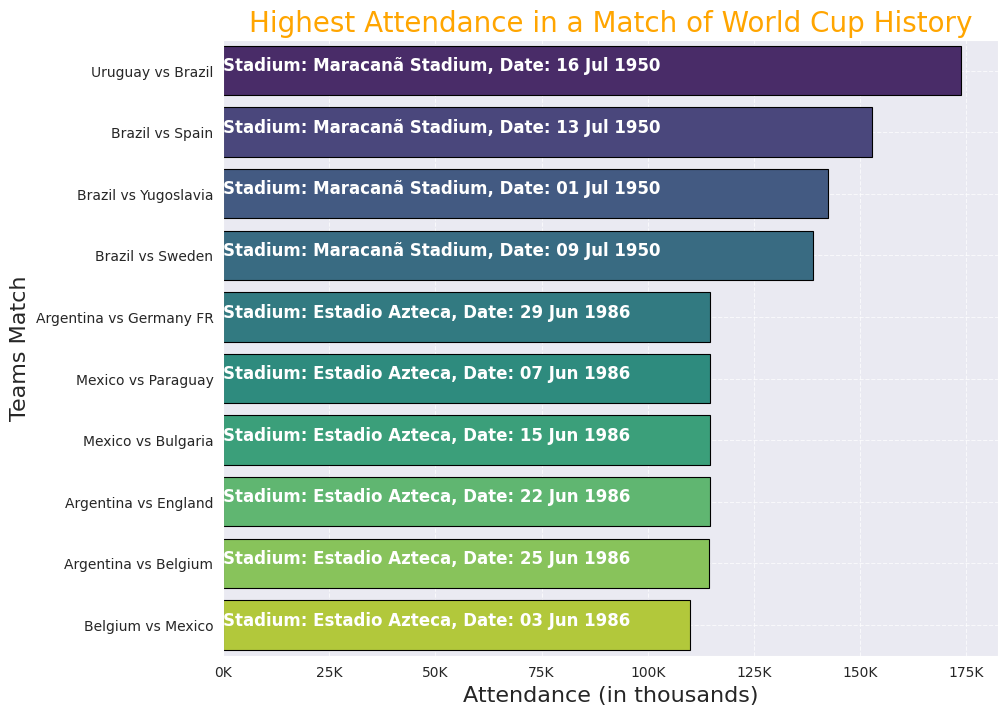

In [404]:
def Highest_Attendance(x):
    h_att = x.sort_values(by="Attendance", ascending=False)[:10]
    h_att = h_att[['Year', 'Datetime', 'Stadium', 'City', 'Home Team Name',
                   'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
    h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho', "Maracanã Stadium")
    h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0]
    h_att["Match"] = h_att["Home Team Name"] + " vs " + h_att["Away Team Name"]
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(y=h_att["Match"],
                     x=h_att["Attendance"],
                     palette="viridis",
                     linewidth=0.8,
                     edgecolor="k")
    plt.xlabel("Attendance (in thousands)", fontsize=16)
    plt.ylabel("Teams Match", fontsize=16)
    plt.title("Highest Attendance in a Match of World Cup History", fontsize=20, color='orange')
    ticks = np.arange(0, 200000, 25000)
    labels = ["{}K".format(i // 1000) for i in ticks]
    plt.xticks(ticks, labels)
    plt.grid(True, linestyle='--', alpha=0.7)
    for i, (stadium, date) in enumerate(zip(h_att["Stadium"], h_att["Datetime"])):
        text = f"Stadium: {stadium}, Date: {date}"
        ax.text(.7, i, text, fontsize=12, color="white", weight="bold")
    plt.show()
Highest_Attendance(df_Matches)


**Stadiums with Highest Average Attendance**

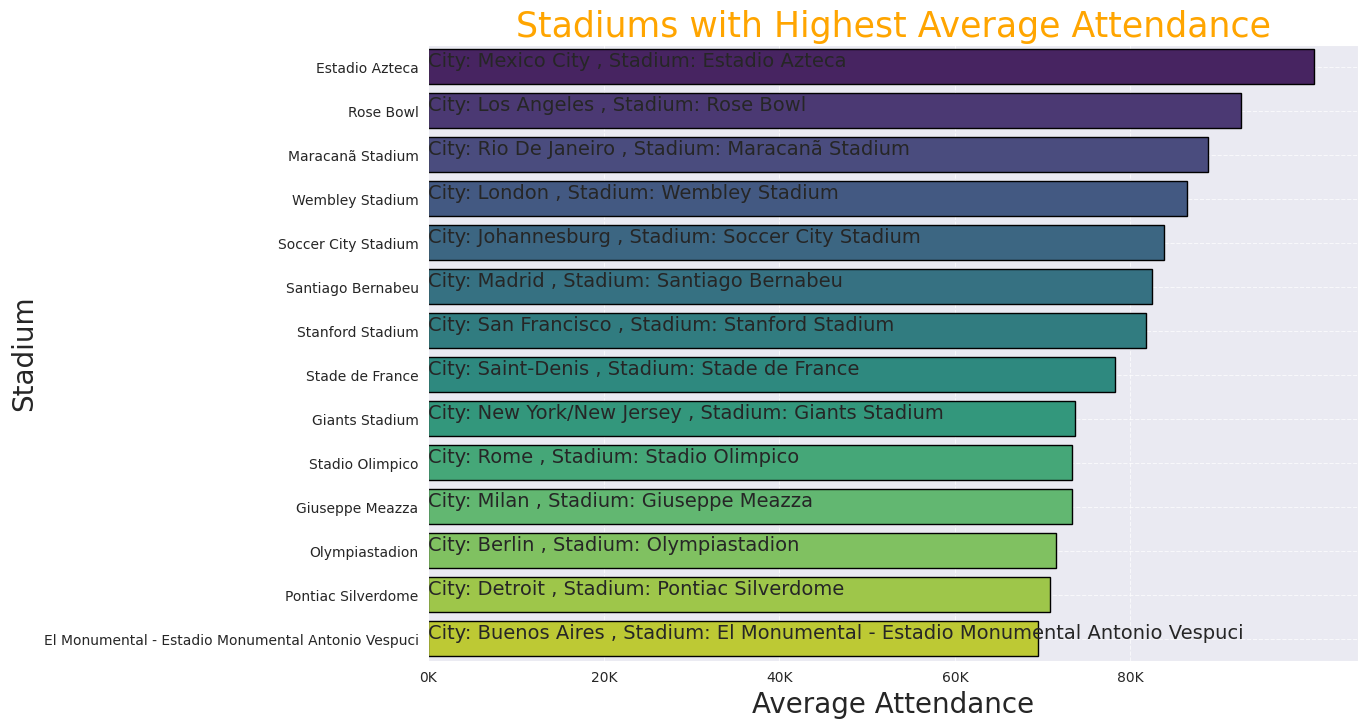

In [405]:
df_Matches["Year"] = df_Matches["Year"]
df_Matches["Datetime"] = df_Matches["Datetime"].str.split("-").str[0]
df_Matches["Stadium"] = df_Matches["Stadium"].replace('Estadio do Maracana', 'Maracanã Stadium')
df_Matches["Stadium"] = df_Matches["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho', 'Maracanã Stadium')
std = df_Matches.groupby(["Stadium", "City"])["Attendance"].mean().reset_index().sort_values(by="Attendance", ascending=False)
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=std["Stadium"][:14],
                 x=std["Attendance"][:14],
                 linewidth=1,
                 edgecolor="k" ,
                 palette="viridis")
plt.xlabel("Average Attendance", fontsize=20)
plt.ylabel("Stadium", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
ticks = np.arange(0, 100000, 20000)
labels = ["{}K".format(i // 1000) for i in ticks]
plt.xticks(ticks, labels)
for i, (city, stadium) in enumerate(zip(std["City"][:14], std["Stadium"][:14])):
    text = f"City: {city}, Stadium: {stadium}"
    ax.text(.7, i, text, fontsize=14)
plt.title("Stadiums with Highest Average Attendance", fontsize=25, color='orange')
plt.show()


**Cities with Maximum World Cup Matches**

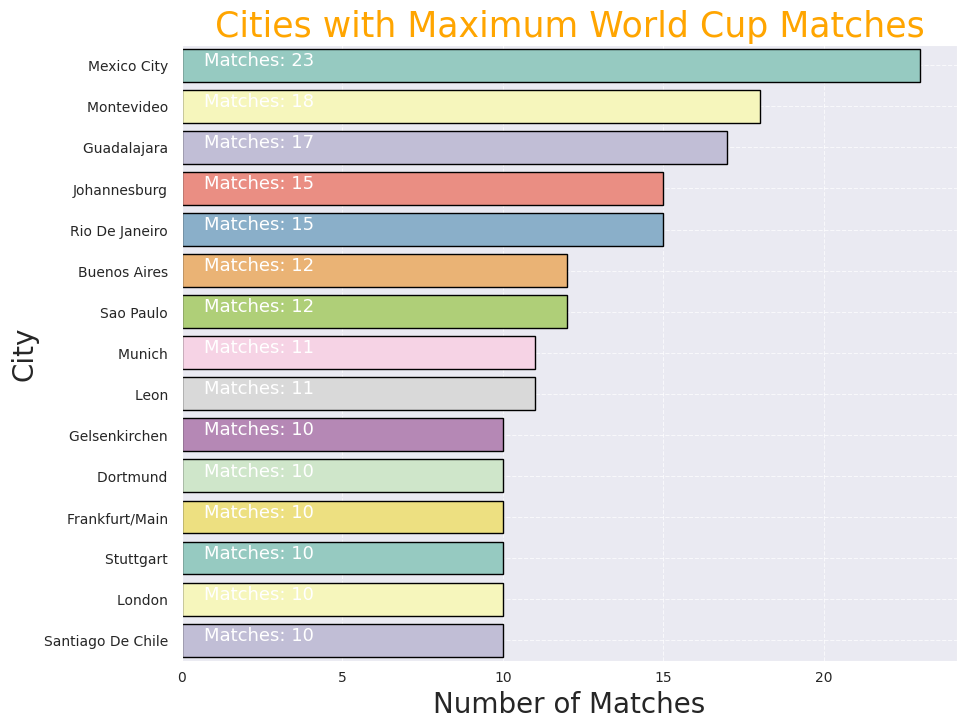

In [406]:
mat_c = df_Matches["City"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=mat_c["index"][:15],
                 x=mat_c["City"][:15],
                 palette="Set3",
                 linewidth=1, edgecolor="k" )
plt.xlabel("Number of Matches", fontsize=20)
plt.ylabel("City", fontsize=20)
plt.title("Cities with Maximum World Cup Matches", fontsize=25, color='orange')
plt.grid(True, linestyle='--', alpha=0.7)
for i, matches in enumerate(mat_c["City"][:15]):
    text = f"Matches: {matches}"
    ax.text(.7, i, text, fontsize=13, color="w")
plt.show()


**Average Attendance by City**

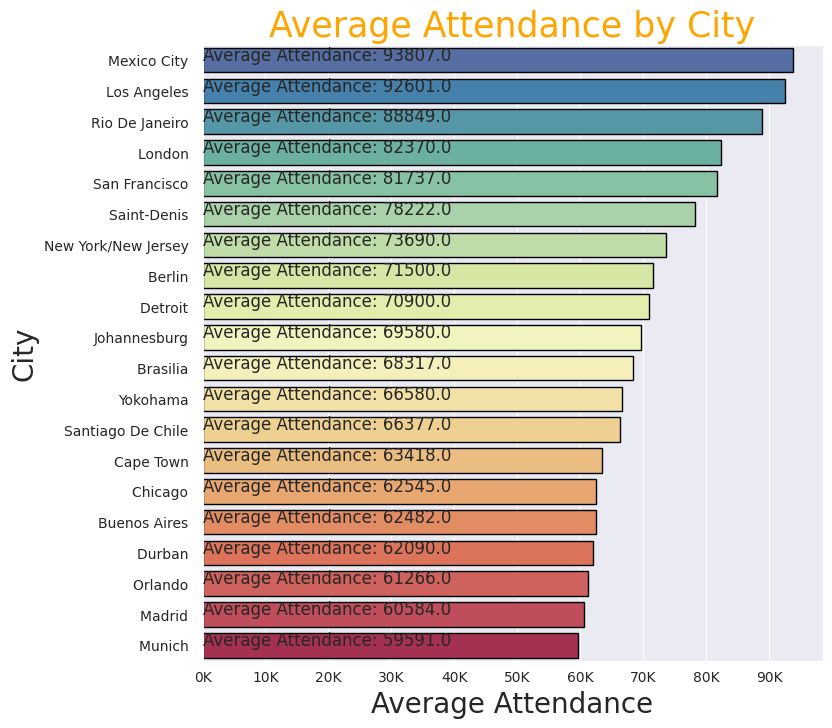

In [407]:
df_Matches["Attendance"] = pd.to_numeric(df_Matches["Attendance"], errors='coerce')
ct_at = df_Matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance", ascending=False).dropna()
plt.figure(figsize=(8, 8))
ax = sns.barplot(x="Attendance", y="City",
                 data=ct_at[:20],
                 linewidth=1,
                 edgecolor="k",
                 palette="Spectral_r")
plt.xlabel("Average Attendance", fontsize=20)
plt.ylabel("City", fontsize=20)
ticks = np.arange(0, 100000, 10000)
labels = ["{}K".format(i // 1000) for i in ticks]
plt.xticks(ticks, labels)
for i, j in enumerate("Average Attendance: " + np.around(ct_at["Attendance"][:20], 0).astype(str)):
    ax.text(.7, i, j, fontsize=12)
plt.title("Average Attendance by City", fontsize=25, color="orange")
plt.show()


**Teams with the Most World Cup Victories**

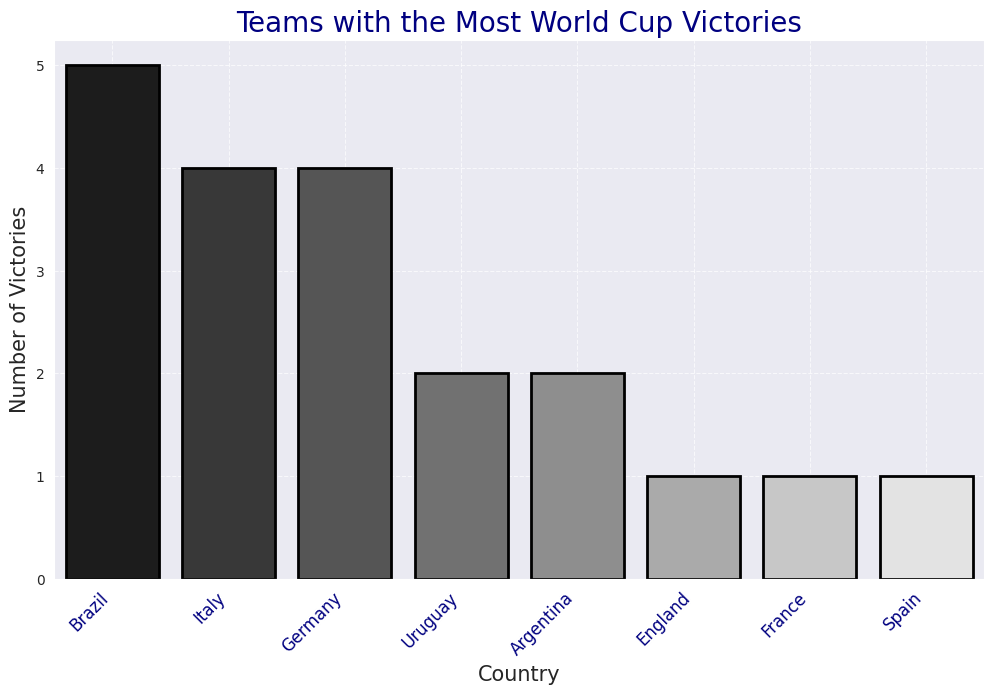

In [408]:
df_Cups["Winner"] = df_Cups["Winner"].replace("Germany FR", "Germany")
df_Cups["Runners-Up"] = df_Cups["Runners-Up"].replace("Germany FR", "Germany")
cou = df_Cups["Winner"].value_counts().reset_index()
plt.figure(figsize=(12, 7))
ax = sns.barplot(x="index", y="Winner", data=cou, palette="binary_r",
                 linewidth=2, edgecolor="k" )
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel("Number of Victories", fontsize=15)
plt.xlabel("Country", fontsize=15)
plt.title("Teams with the Most World Cup Victories", fontsize=20, color='navy')
plt.xticks(rotation=45, ha='right', color='navy', fontsize=12)
plt.show()


**Final Results by Nation**

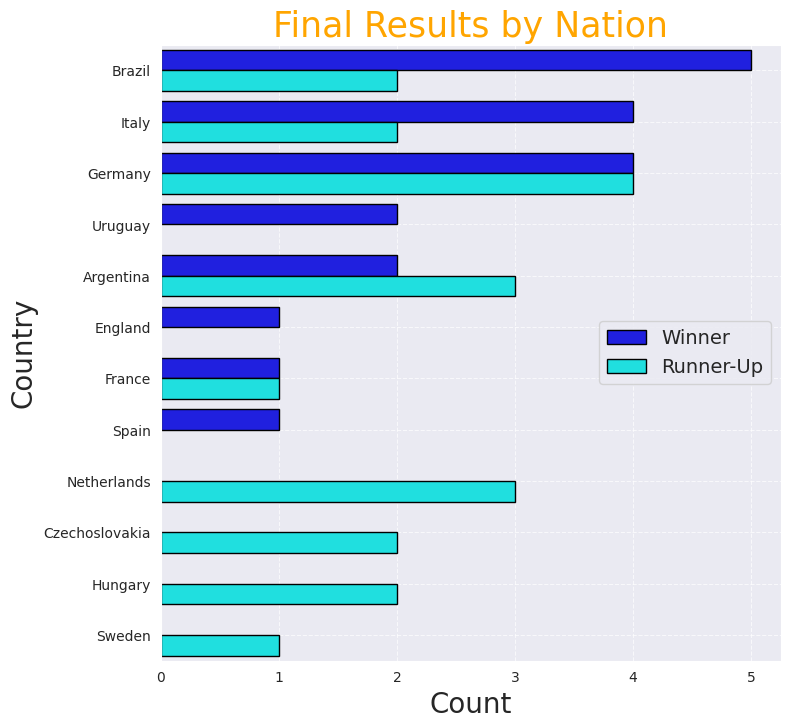

In [409]:
df_Cups["Winner"] = df_Cups["Winner"].replace("Germany FR", "Germany")
df_Cups["Runners-Up"] = df_Cups["Runners-Up"].replace("Germany FR", "Germany")
cou_w = df_Cups["Winner"].value_counts().reset_index()
cou_w.columns = ["Country", "Count"]
cou_w["Type"] = "Winner"
cou_r = df_Cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["Country", "Count"]
cou_r["Type"] = "Runner-Up"
cou_t = pd.concat([cou_w, cou_r], axis=0)
plt.figure(figsize=(8, 8))
sns.barplot(x="Count", y="Country",
            data=cou_t,
            hue="Type",
            palette={"Winner": "b", "Runner-Up": "cyan"},
            linewidth=1,
            edgecolor="k")
plt.xlabel("Count", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc="center right", prop={"size": 14})
plt.title("Final Results by Nation", fontsize=25, color="orange")
plt.show()


**World Cup Final Result for Third and Fourth Place**

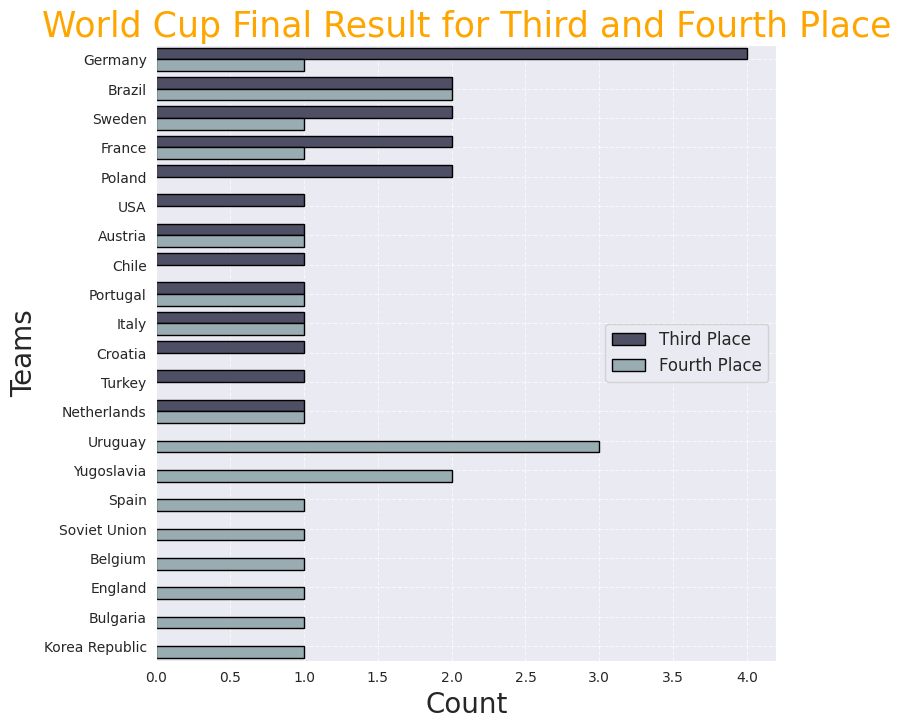

In [410]:
df_Cups["Third"] = df_Cups["Third"].replace("Germany FR", "Germany")
df_Cups["Fourth"] = df_Cups["Fourth"].replace("Germany FR", "Germany")
third = df_Cups["Third"].value_counts().reset_index()
third.columns = ["Team", "Count"]
third["Type"] = "Third Place"
fourth = df_Cups["Fourth"].value_counts().reset_index()
fourth.columns = ["Team", "Count"]
fourth["Type"] = "Fourth Place"
plcs = pd.concat([third, fourth], axis=0)
plt.figure(figsize=(8, 8))
sns.barplot(x="Count", y="Team", data=plcs, hue="Type",
            linewidth=1, edgecolor="k",
            palette="bone")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel("Count", fontsize=20)
plt.ylabel("Teams", fontsize=20)
plt.title("World Cup Final Result for Third and Fourth Place", fontsize=25, color="orange")
plt.legend(loc="center right", prop={"size": 12})
plt.show()

**Teams with the Most Matches**

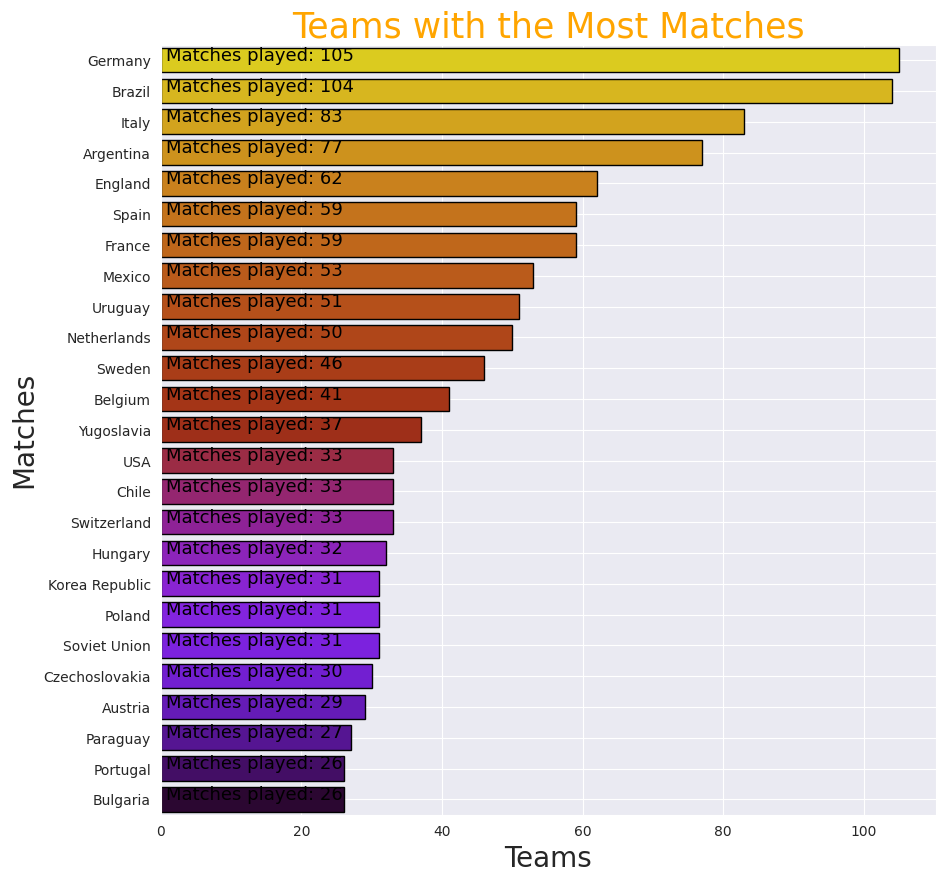

In [411]:
teams_to_replace = {
    'rn">United Arab Emirates': 'United Arab Emirates',
    "C�te d'Ivoire": "Côte d’Ivoire",
    'rn">Republic of Ireland': 'Republic of Ireland',
    'rn">Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'rn">Serbia and Montenegro': 'Serbia and Montenegro',
    'rn">Trinidad and Tobago': 'Trinidad and Tobago',
    'Germany FR': 'Germany'
}

df_Matches["Home Team Name"] = df_Matches["Home Team Name"].replace(teams_to_replace, regex=True)
df_Matches["Away Team Name"] = df_Matches["Away Team Name"].replace(teams_to_replace, regex=True)

ht = df_Matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team", "matches"]
at = df_Matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team", "matches"]
mt = pd.concat([ht, at], axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches", ascending=False)

plt.figure(figsize=(10, 10))
ax = sns.barplot(x="matches", y="team", data=mt[:25], palette="gnuplot_r",
                 linewidth=1, edgecolor="k")
plt.grid(True)
plt.xlabel("Teams", fontsize=20)
plt.ylabel("Matches", fontsize=20)
plt.title("Teams with the Most Matches", fontsize=25, color="orange")
for i, j in enumerate("Matches played: " + mt["matches"][:25].astype(str)):
    ax.text(.7, i, j, fontsize=13, color="black")

plt.show()


**Teams with the most tournament participations**

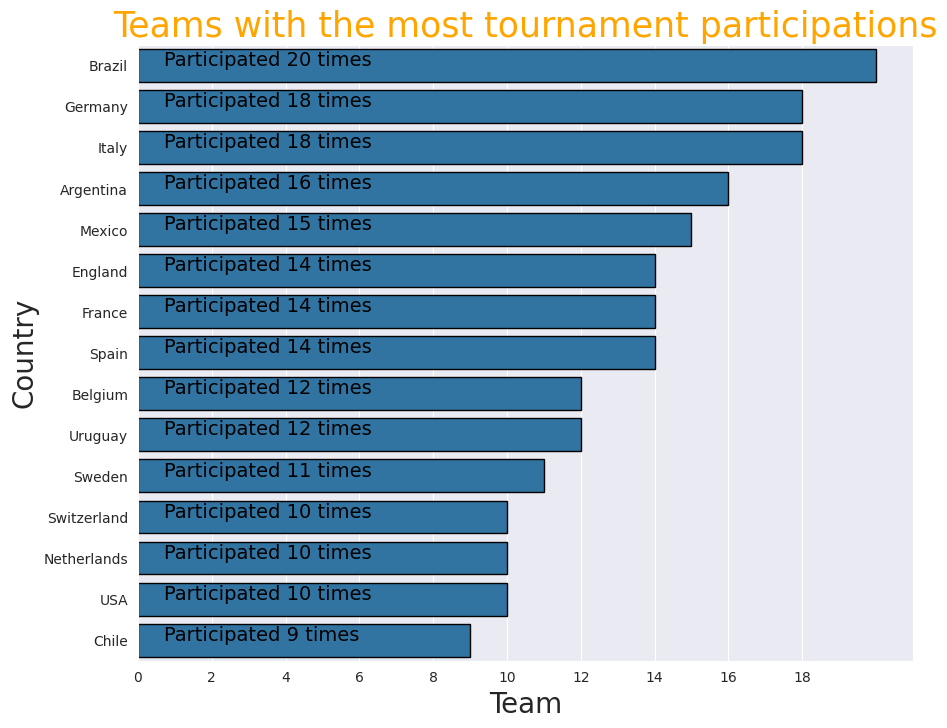

In [412]:
hy = df_Matches[["Year", "Home Team Name"]]
hy.columns = ["year", "team"]
hy["type"] = "HOME TEAM"
ay = df_Matches[["Year", "Away Team Name"]]
ay.columns = ["year", "team"]
ay["type"] = "AWAY TEAM"
home_away = pd.concat([hy, ay], axis=0)
yt = home_away.groupby(["year", "team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="team", y="index", data=yt[:15], linewidth=1, edgecolor="k" )
for i, j in enumerate("Participated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7, i, j, fontsize=14, color="k")
plt.xticks(np.arange(0, 20, 2))
plt.xlabel("Team", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Teams with the most tournament participations", fontsize=25, color="orange")
plt.show()


**Distribution of Home Team Goals**

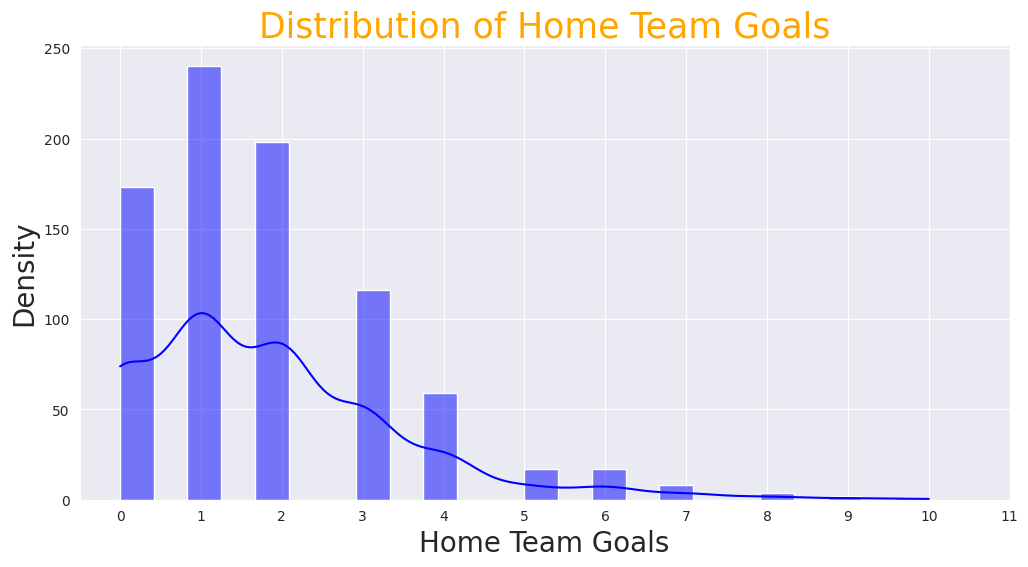

In [413]:
plt.figure(figsize=(12, 13))
plt.subplot(211)
sns.histplot(df_Matches["Home Team Goals"], color="b", kde=True, )
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Home Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.title("Distribution of Home Team Goals", fontsize=25, color="orange")
plt.show()


**Distribution of Away Team Goals**

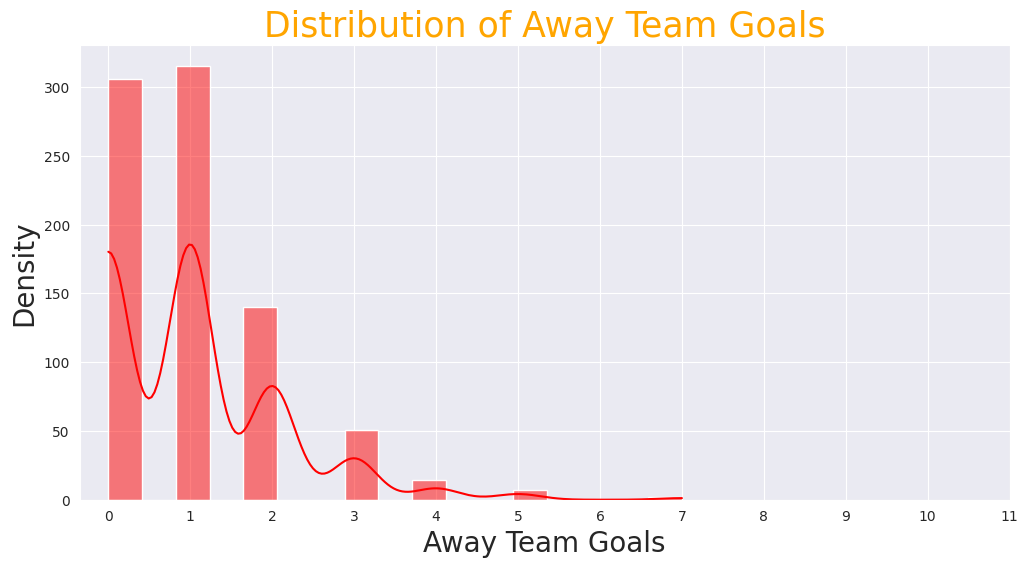

In [414]:
plt.figure(figsize=(12, 13))
plt.subplot(212)
sns.histplot(df_Matches["Away Team Goals"], color="r", kde=True,)
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Away Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.title("Distribution of Away Team Goals", fontsize=25, color="orange")
plt.show()

**Home and Away Goals by Year**

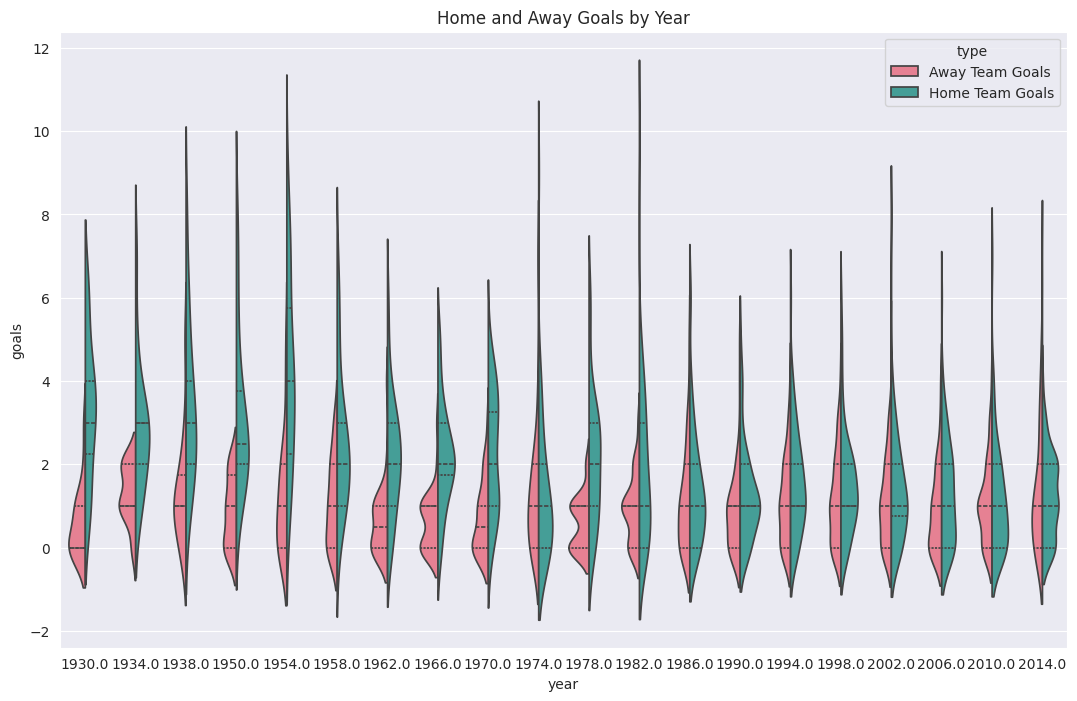

In [415]:
gh = df_Matches[["Year", "Home Team Goals"]]
gh.columns = ["year", "goals"]
gh["type"] = "Home Team Goals"

ga = df_Matches[["Year", "Away Team Goals"]]
ga.columns = ["year", "goals"]
ga["type"] = "Away Team Goals"

goals = pd.concat([ga, gh], axis=0)

plt.figure(figsize=(13, 8))
sns.violinplot(x=goals["year"], y=goals["goals"],
               hue=goals["type"], split=True, inner="quart", palette="husl")

plt.title("Home and Away Goals by Year")
plt.show()


**First Half Home and Away Goals by Year**

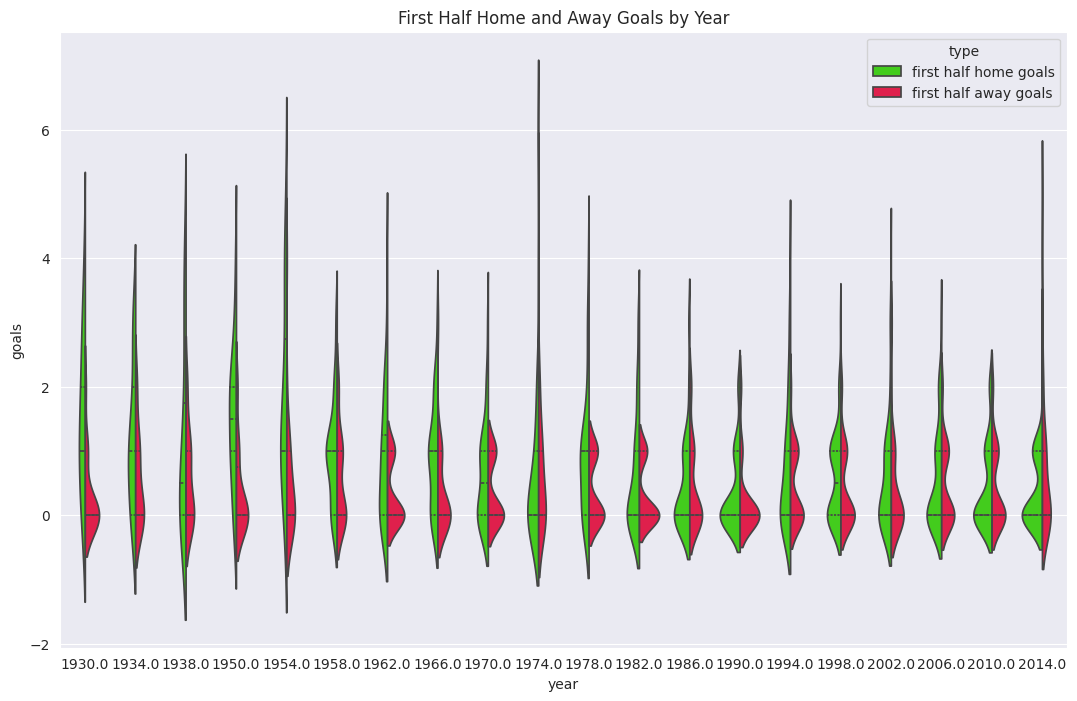

In [416]:
hhg = df_Matches[["Year", 'Half-time Home Goals']]
hhg.columns = ["year", "goals"]
hhg["type"] = 'first half home goals'

hag = df_Matches[["Year", 'Half-time Away Goals']]
hag.columns = ["year", "goals"]
hag["type"] = 'first half away goals'

half_time = pd.concat([hhg, hag], axis=0)

plt.figure(figsize=(13, 8))
sns.violinplot(x=half_time["year"],y = half_time["goals"], hue=half_time["type"],
               split=True, inner="quart", palette="prism")
plt.title("First Half Home and Away Goals by Year")
plt.show()


**Second Half Home and Away Goals by Year**

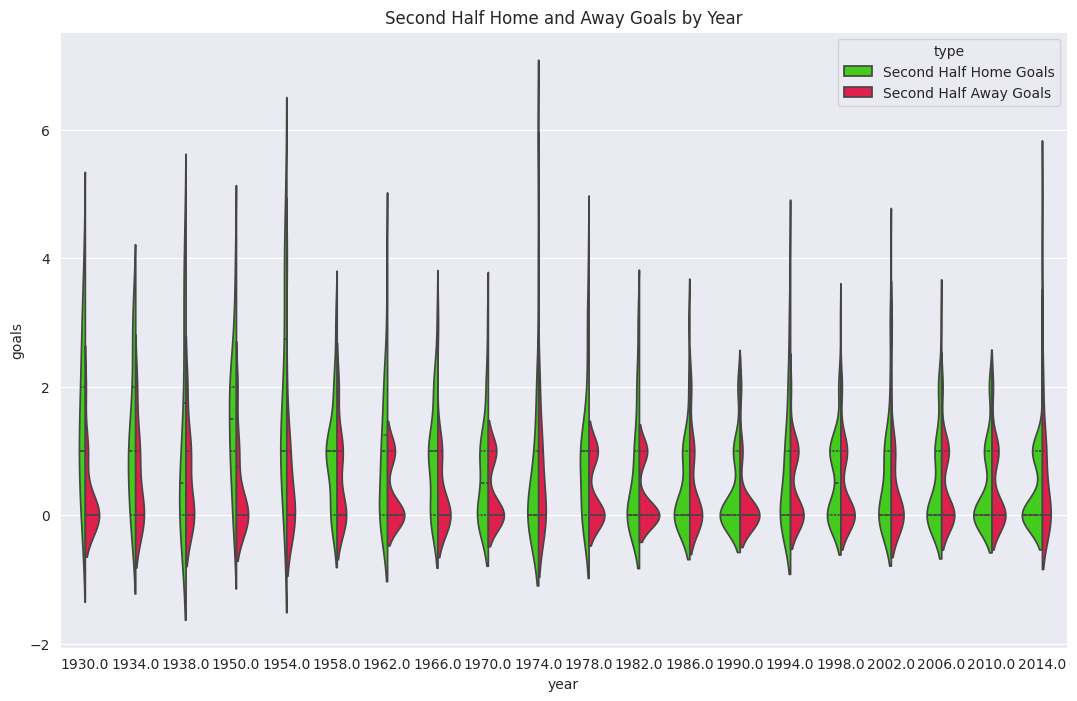

In [417]:
shg = df_Matches[["Year", 'Half-time Home Goals']]
shg.columns = ["year", "goals"]
shg["type"] = 'Second Half Home Goals'

sag = df_Matches[["Year", 'Half-time Away Goals']]
sag.columns = ["year", "goals"]
sag["type"] = 'Second Half Away Goals'

s_half_time = pd.concat([shg, sag], axis=0)

plt.figure(figsize=(13, 8))
sns.violinplot(x=s_half_time["year"],
               y=s_half_time["goals"],
               hue=s_half_time["type"],
               split=True, inner="quart",
               palette="prism")
plt.title("Second Half Home and Away Goals by Year")
plt.show()


**Match Outcomes by Home and Away Teams**

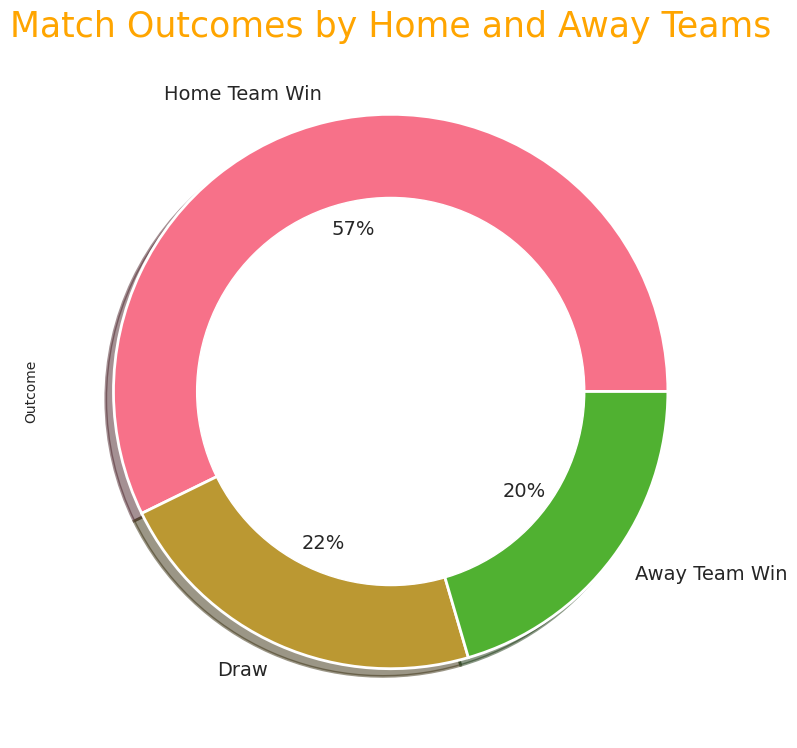

In [418]:
def label(row):
    if row["Home Team Goals"] > row["Away Team Goals"]:
        return "Home Team Win"
    elif row["Away Team Goals"] > row["Home Team Goals"]:
        return "Away Team Win"
    else:
        return "Draw"

df_Matches["Outcome"] = df_Matches.apply(label, axis=1)

plt.figure(figsize=(9, 9))
df_Matches["Outcome"].value_counts().plot.pie(autopct="%1.0f%%", fontsize=14,
                                              colors=sns.color_palette("husl"),
                                              wedgeprops={"linewidth": 2, "edgecolor": "white"},
                                              shadow=True)
circ = plt.Circle((0, 0), 0.7, color="white")
plt.gca().add_artist(circ)
plt.title("Match Outcomes by Home and Away Teams", fontsize=25, color="orange")
plt.show()


**Match outcomes by countries**

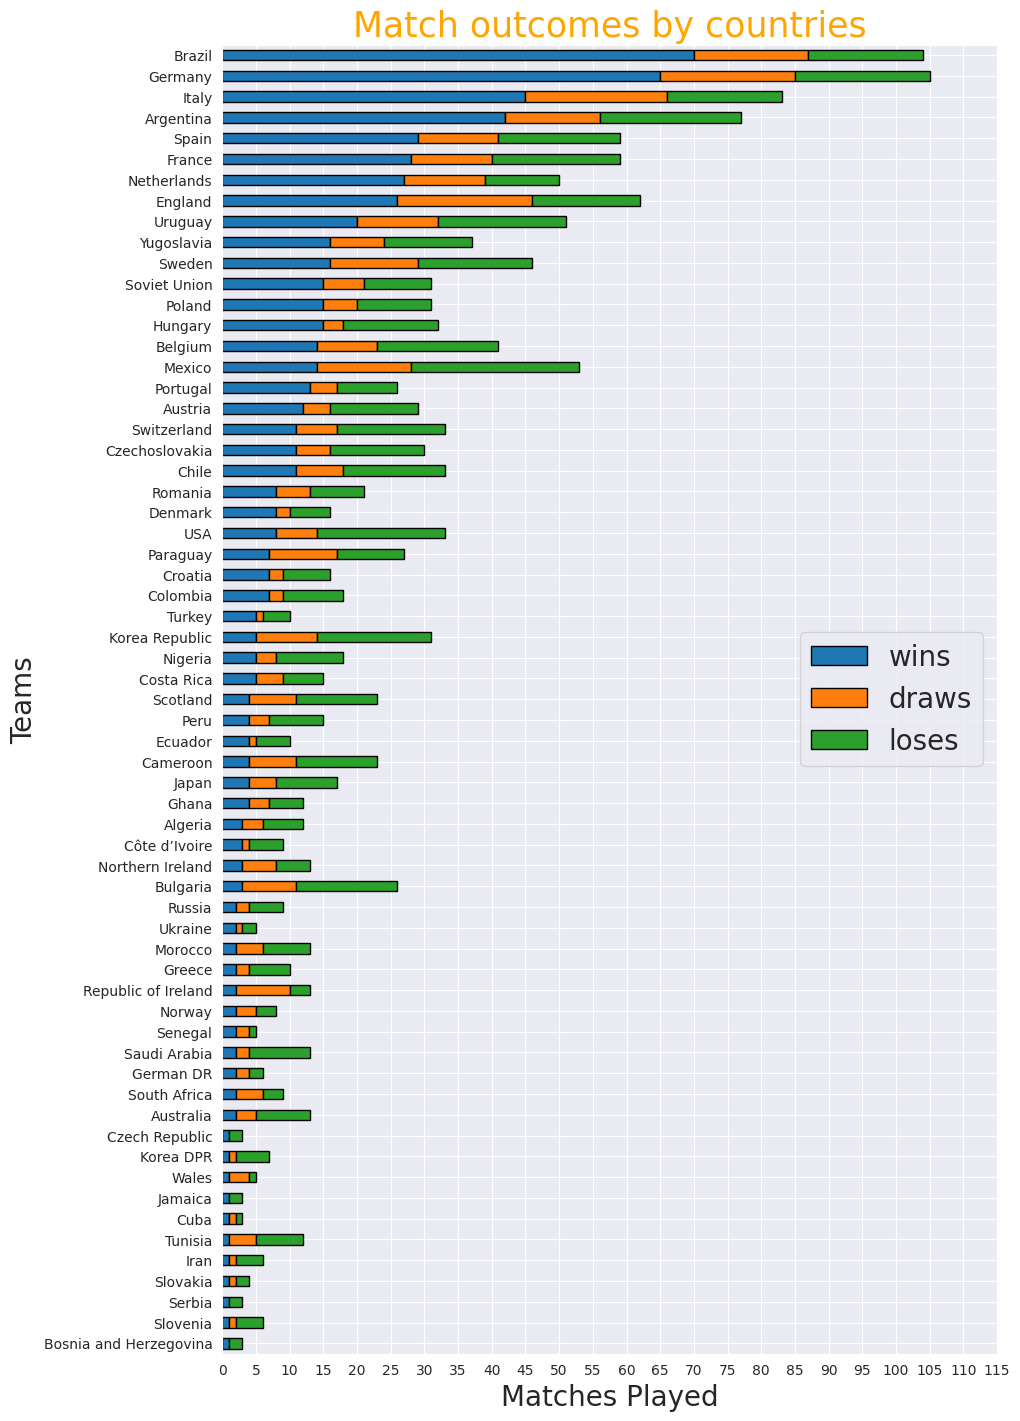

In [419]:
df_Matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',]]

def win_label(df_Matches):
    if df_Matches["Home Team Goals"] > df_Matches["Away Team Goals"]:
        return df_Matches["Home Team Name"]
    if df_Matches["Home Team Goals"] < df_Matches["Away Team Goals"]:
        return df_Matches["Away Team Name"]
    if df_Matches["Home Team Goals"] == df_Matches["Away Team Goals"]:
        return "DRAW"

def lost_label(df_Matches):
    if df_Matches["Home Team Goals"] < df_Matches["Away Team Goals"]:
        return df_Matches["Home Team Name"]
    if df_Matches["Home Team Goals"] > df_Matches["Away Team Goals"]:
        return df_Matches["Away Team Name"]
    if df_Matches["Home Team Goals"] == df_Matches["Away Team Goals"]:
        return "DRAW"

df_Matches["win_team"]  = df_Matches.apply(lambda df_Matches:win_label(df_Matches),axis=1)
df_Matches["lost_team"] = df_Matches.apply(lambda df_Matches:lost_label(df_Matches),axis=1)
lost = df_Matches["lost_team"].value_counts().reset_index()
win = df_Matches["win_team"].value_counts().reset_index()
wl  = win.merge(lost,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]
wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",
                                   stacked=True,
                                   figsize=(10,17),
                                  linewidth=1,edgecolor="k")
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries" , fontsize = 25 , color = "orange")
plt.xlabel("Matches Played",fontsize = 20 )
plt.ylabel("Teams" , fontsize = 20 )
plt.show()

**Countries with maximum Wins & Loses & Draws**

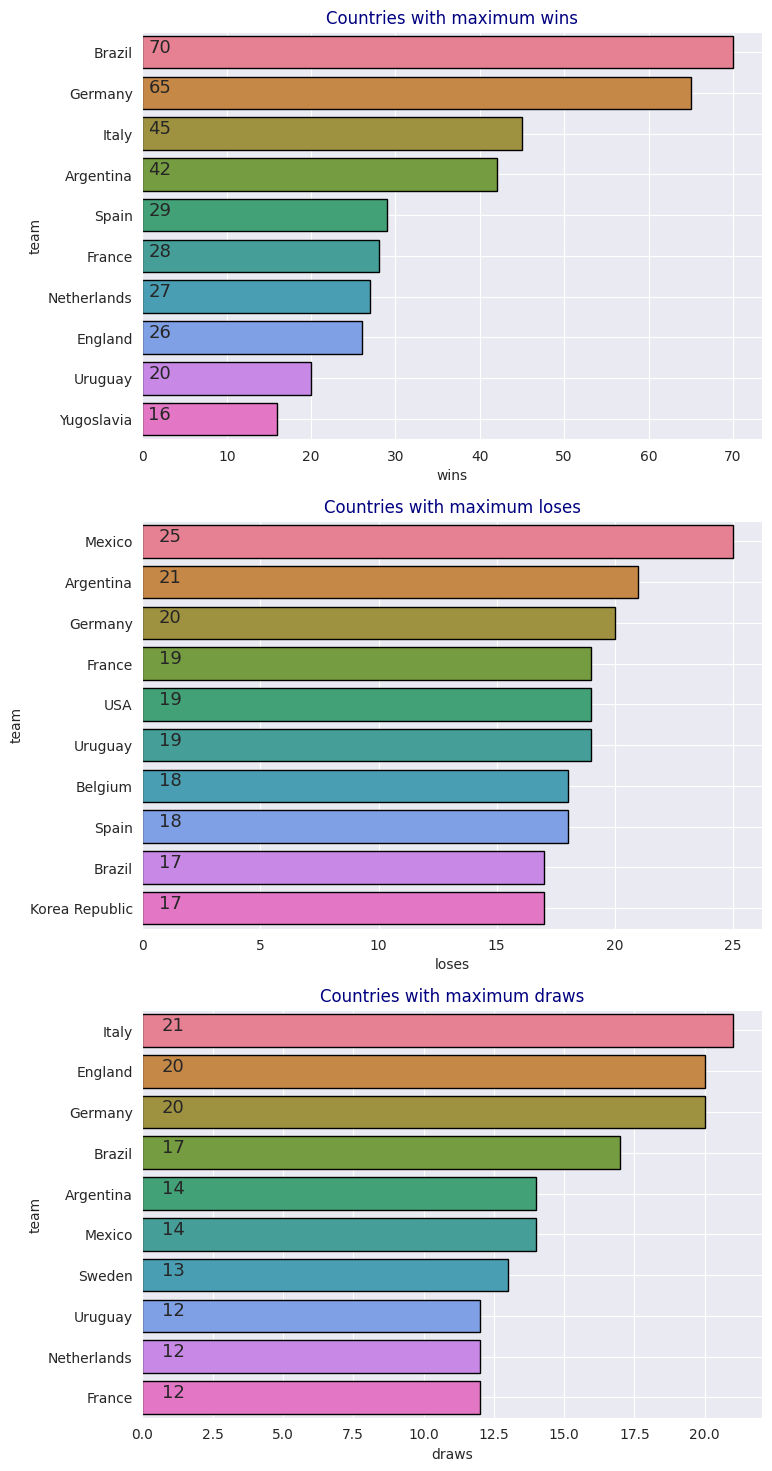

In [420]:
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(x=i,y="team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k",palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)

    plt.grid(True)
    plt.title("Countries with maximum "+i,color="navy")

**Teams with highest fifa world cup goals**

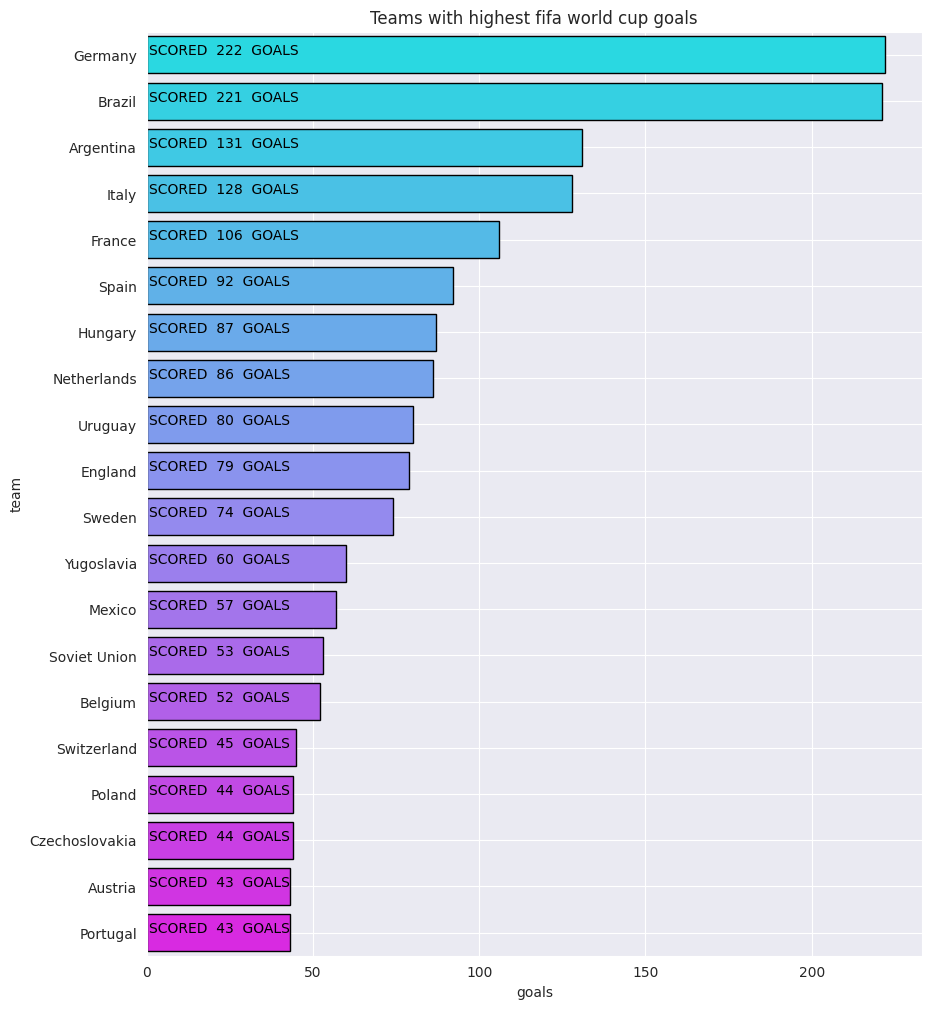

In [421]:
tt_gl_h = df_Matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = df_Matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot(x="goals",y="team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k")

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals")
plt.grid(True)

**Highest total goals scored during a match**

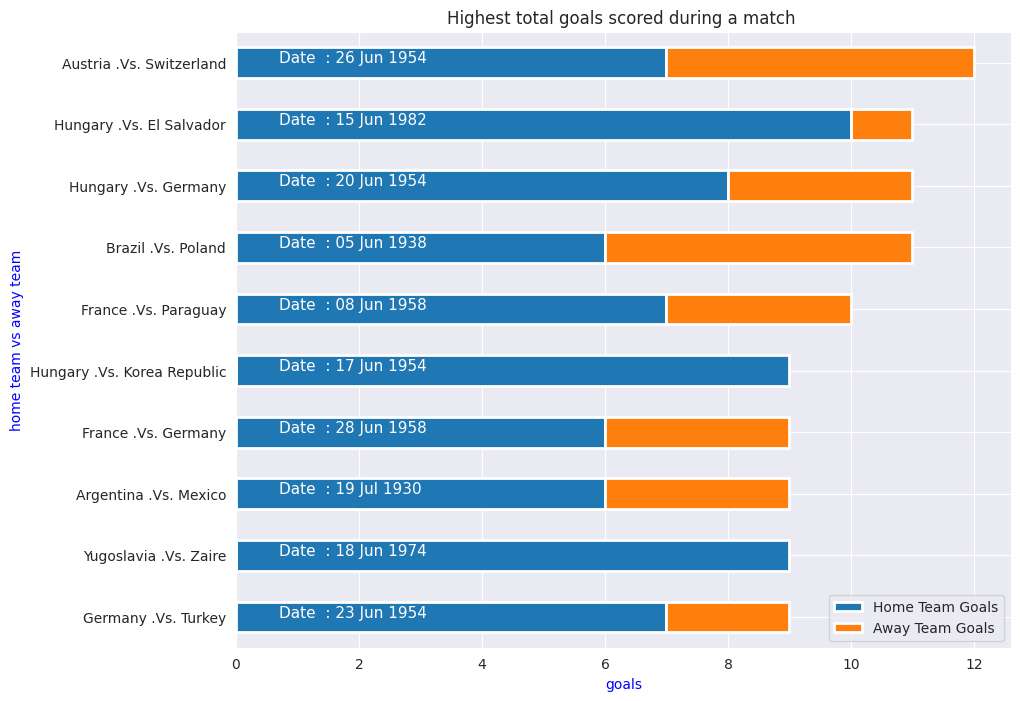

In [422]:
df_Matches["total_goals"] = df_Matches["Home Team Goals"] + df_Matches["Away Team Goals"]
hig_gl = df_Matches.sort_values(by="total_goals",ascending =False)[:10][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,8),linewidth=2,
                                                       edgecolor="w")

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ")

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)

plt.show()

**Total goals scored during game by year**

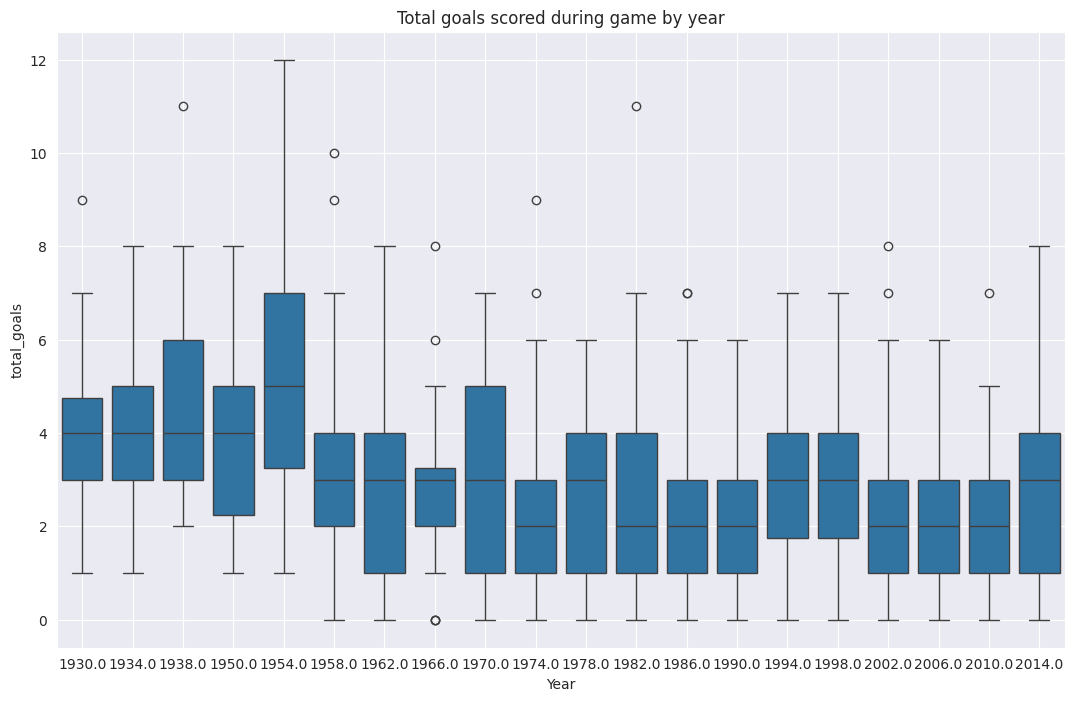

In [423]:
plt.figure(figsize=(13,8))
sns.boxplot(y=df_Matches["total_goals"],x=df_Matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year")
plt.show()

**team comparition**

In [424]:
import itertools

def team_compare(team1, team2):
    team_list = [team1, team2]
    dat = mat_new[mat_new["team"].isin(team_list)]

    plt.figure(figsize=(12, 8))
    cols = ["matches", "goals", "wins", "loses"]
    length = len(cols)

    nrows = length // 2  # Use integer division to get the number of rows
    ncols = 2            # Use 2 columns

    for i, j in zip(cols, range(length)):
        plt.subplot(nrows, ncols, j + 1)
        ax = sns.barplot(x=dat[i], y=dat["team"], palette=["royalblue", "r"],
                         linewidth=2, edgecolor="k" )
        plt.ylabel("")
        plt.yticks(fontsize=13)
        plt.grid(True, color="grey", alpha=.3)
        plt.title(i, color="navy", fontsize=15)
        plt.subplots_adjust(wspace=0.3, hspace=0.5)
        ax.set_facecolor("w")

        for k, l in enumerate(dat[i].values):
            ax.text(.7, k, l, weight="bold", fontsize=20)



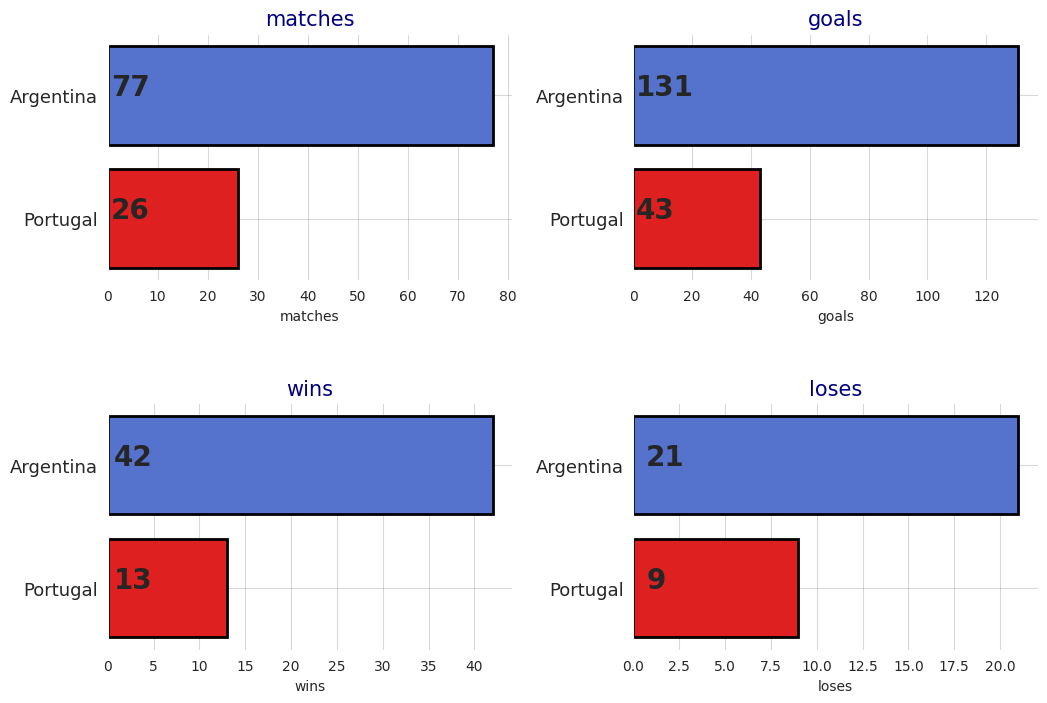

In [425]:
team_compare("Portugal", "Argentina")

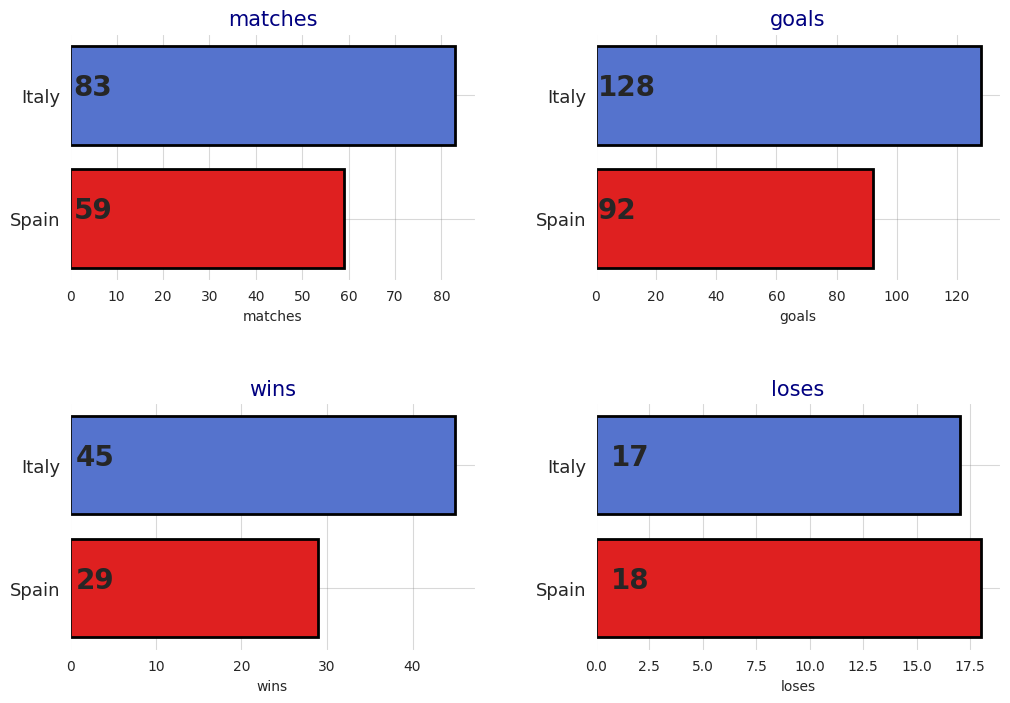

In [426]:
team_compare("Italy","Spain")

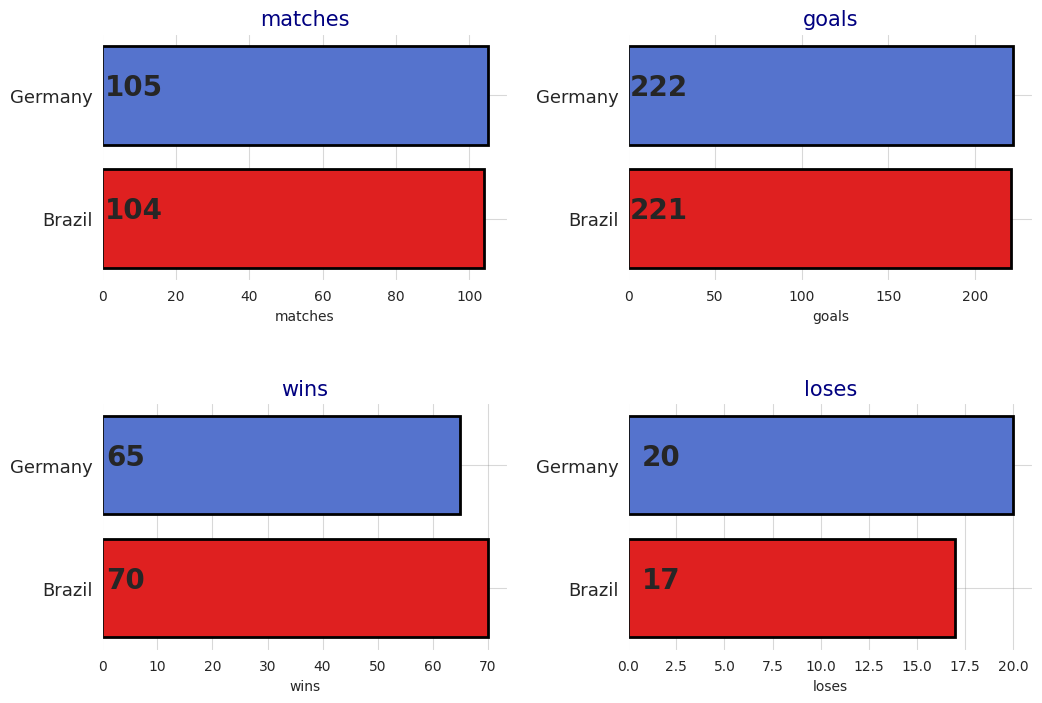

In [427]:
team_compare("Brazil","Germany")

**Referee's with most matches**

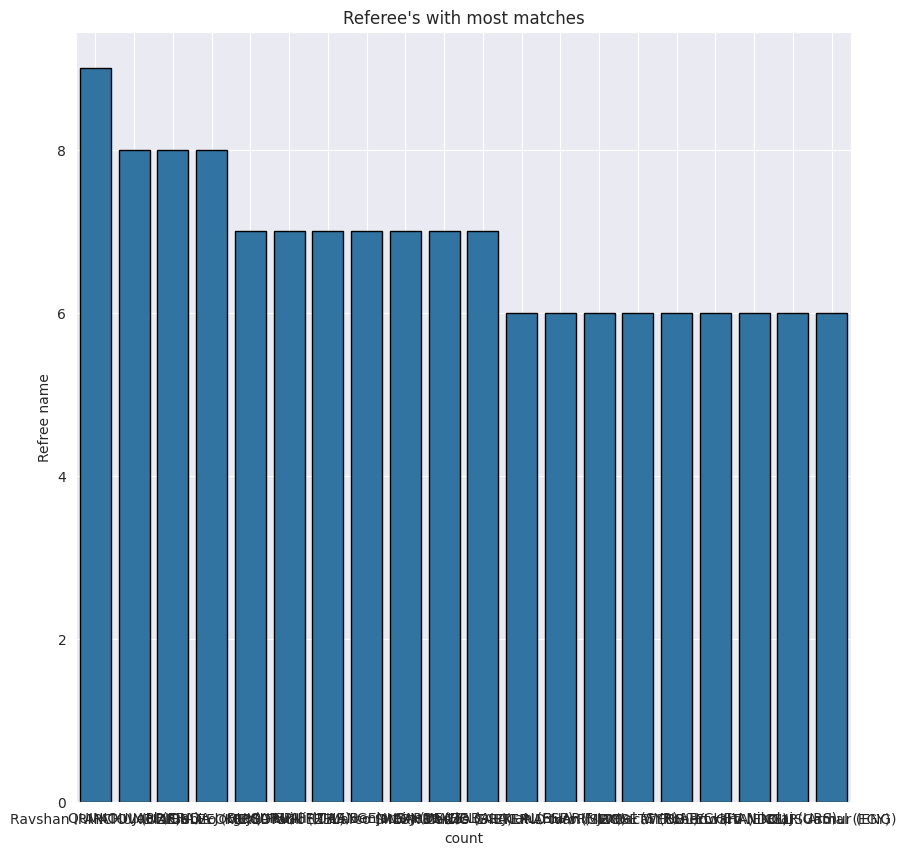

In [428]:
ref = df_Matches["Referee"].value_counts().reset_index()
ref = ref.sort_values(by="Referee",ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(y = "Referee",x="index",data=ref[:20],linewidth=1,edgecolor="k")
plt.xlabel("count")
plt.ylabel("Refree name")
plt.grid(True)
plt.title("Referee's with most matches")
plt.show()

**Goals per match for countries with highest wins**

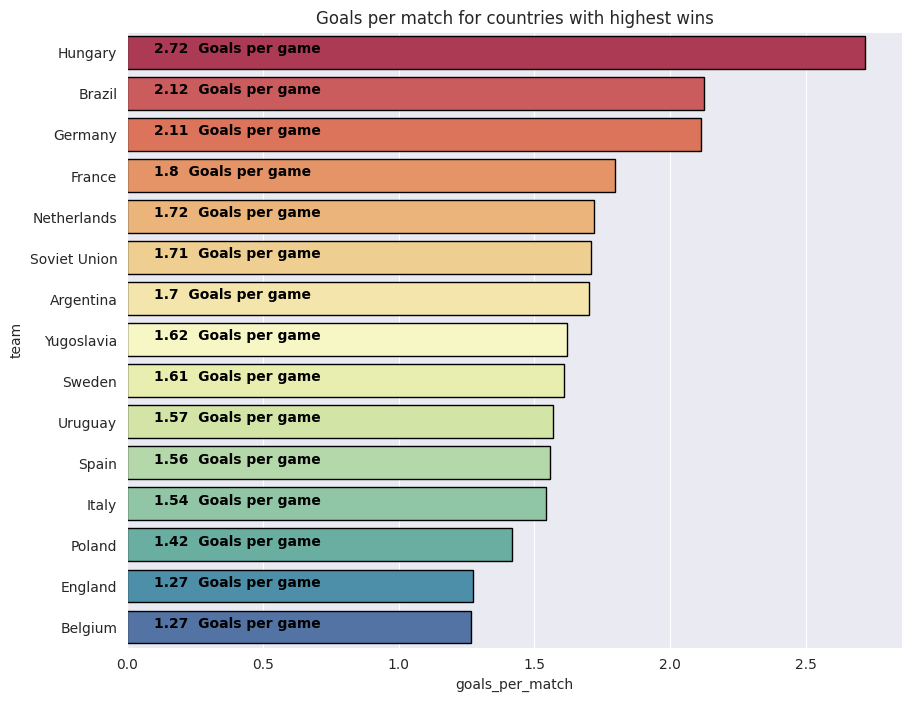

In [429]:
mat_new["goals_per_match"] = mat_new["goals"] / mat_new["matches"]
cou_lst = mat_new.sort_values(by="wins",ascending=False)[:15]["team"].tolist()
cou_gpm = mat_new[mat_new["team"].isin(cou_lst)]
cou_gpm = cou_gpm.sort_values(by="goals_per_match",ascending=False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x="goals_per_match",y="team",
                 linewidth=1,
                 edgecolor=["k"],
                 data=cou_gpm,
                 palette="Spectral")

for i,j in enumerate(np.round(cou_gpm["goals_per_match"],2).astype(str) + "  Goals per game"):
    ax.text(.1,i,j,color="k",weight = "bold")

plt.title("Goals per match for countries with highest wins")
plt.show()

**Interaction between teams in years**

In [430]:
import networkx as nx

def interactions(year,color):

    df  =  df_Matches[df_Matches["Year"] == year][["Home Team Name","Away Team Name"]]
    G   = nx.from_pandas_edgelist(df,"Home Team Name","Away Team Name")

    plt.figure(figsize=(10,9))

    nx.draw_kamada_kawai(G,with_labels = True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "h",
                         linewidths  = 5 ,
                         font_size  = 13 ,
                         alpha=.8)

    plt.title("Interaction between teams :" + str(year) , fontsize =13 , color = "navy")

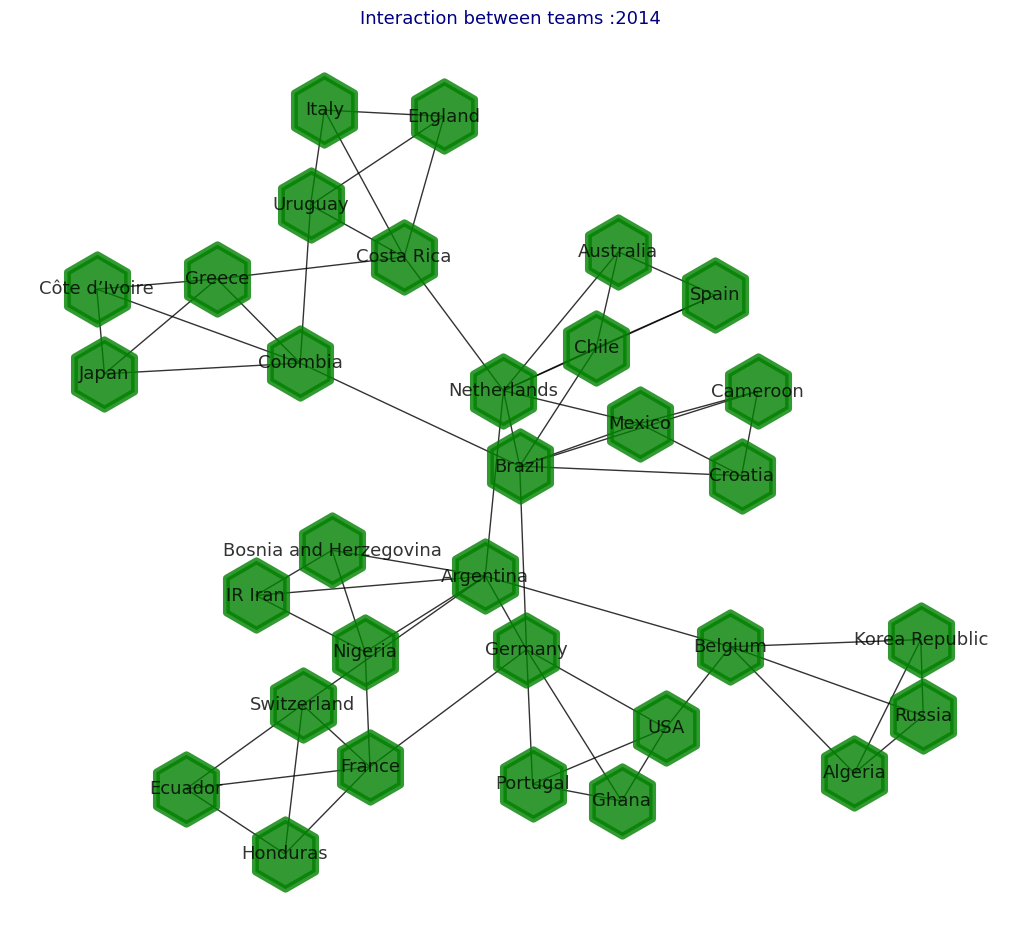

In [431]:
interactions(2014,"green")

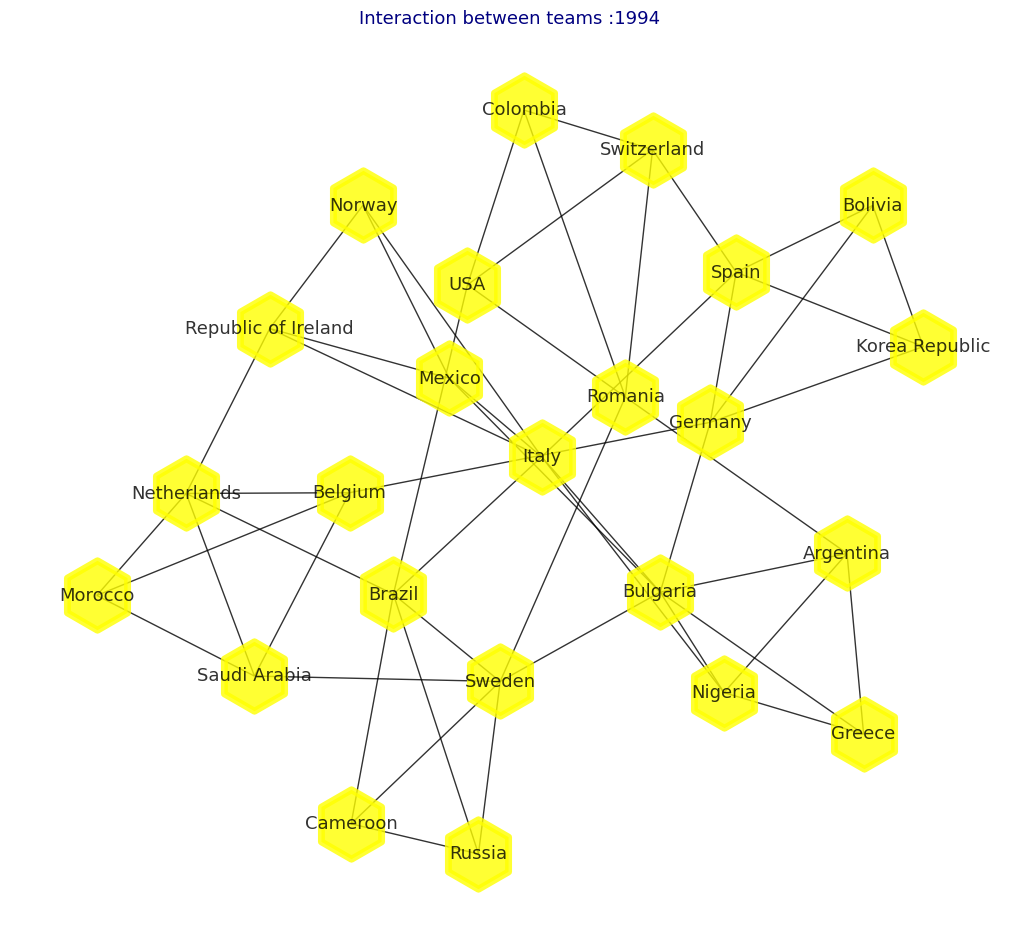

In [432]:
interactions(1994,"yellow")

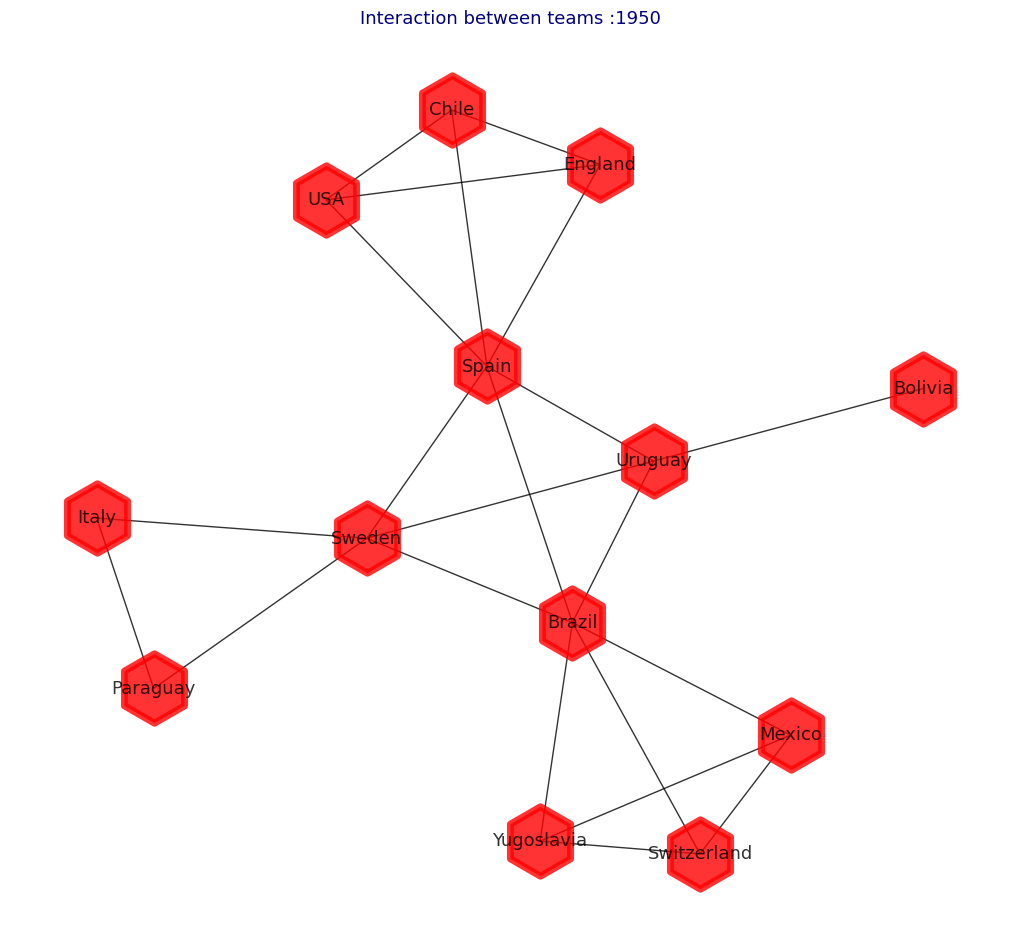

In [433]:
interactions(1950,"red")

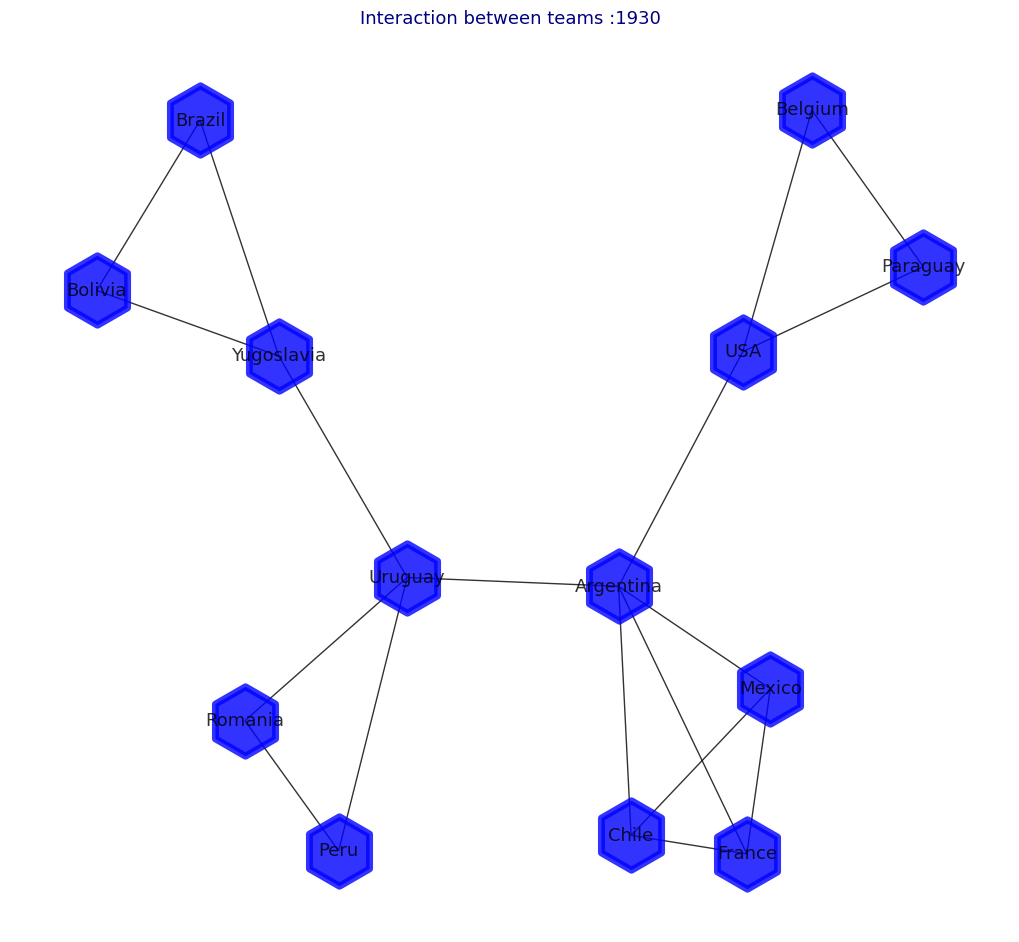

In [434]:
interactions(1930,"blue")

**Total world cup matches played in each country**

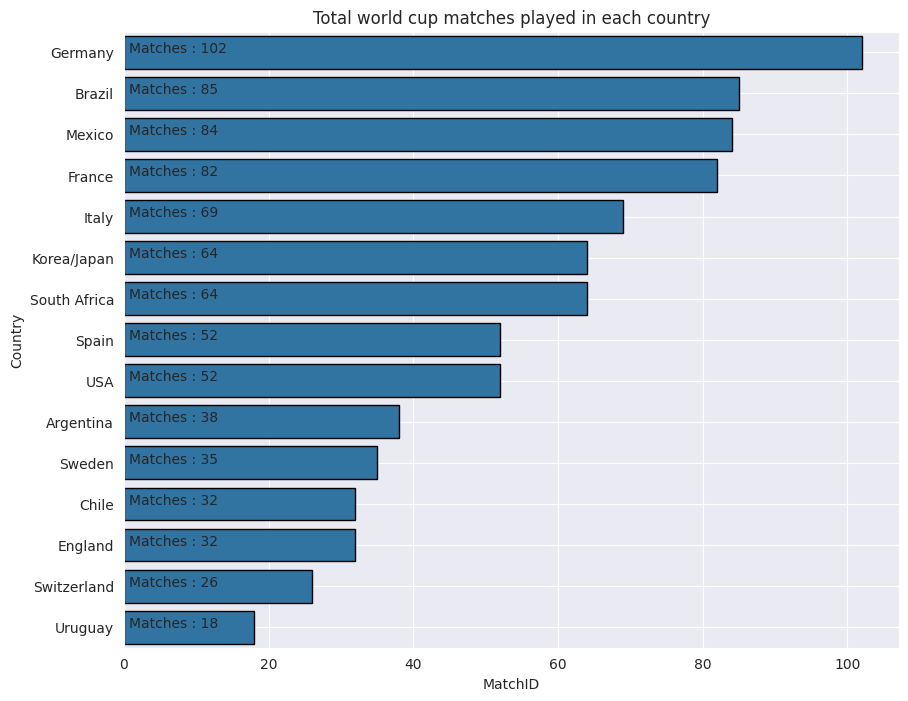

In [435]:
ysc = df_Matches[["Year","Stadium","City","MatchID"]]
cy  = df_Cups[["Year","Country"]]
ysc = ysc.merge(cy,left_on="Year",right_on="Year",how="left")
#ysc["Stadium"] = ysc["Stadium"].str.split(",").str[0]
ysc["std_cty"] = ysc["Stadium"] +" , "+ ysc["City"]

cnt_mat  =  ysc.groupby("Country")["MatchID"].nunique().reset_index()
cnt_mat  =  cnt_mat.sort_values(by= "MatchID",ascending=False)
cnt_mat


plt.figure(figsize=(10,8))

ax = sns.barplot(x="MatchID",y="Country",
                data=cnt_mat,
                linewidth=1,
                edgecolor="k")

for i,j in enumerate("Matches : " + cnt_mat["MatchID"].astype(str)):
    ax.text(.7 ,i,j)

plt.title("Total world cup matches played in each country")
plt.grid(True)
plt.show()

**Country havig Stadium**

In [436]:
ysc["Country_yr"] = ysc["Country"] + " - " + ysc["Year"].astype(str)


def stadium_country(country,color):

    dat2 = ysc[ysc["Country"] == country]

    plt.figure(figsize=(10,8))

    H = nx.from_pandas_edgelist(dat2,"Country","Stadium")

    nx.draw_kamada_kawai(H,
                         with_labels=True,
                         node_size  = 2500,
                         node_color = color,
                         node_shape = "s",
                         linewidths  = 7 ,
                         font_size  = 13 ,
                         alpha=.8)


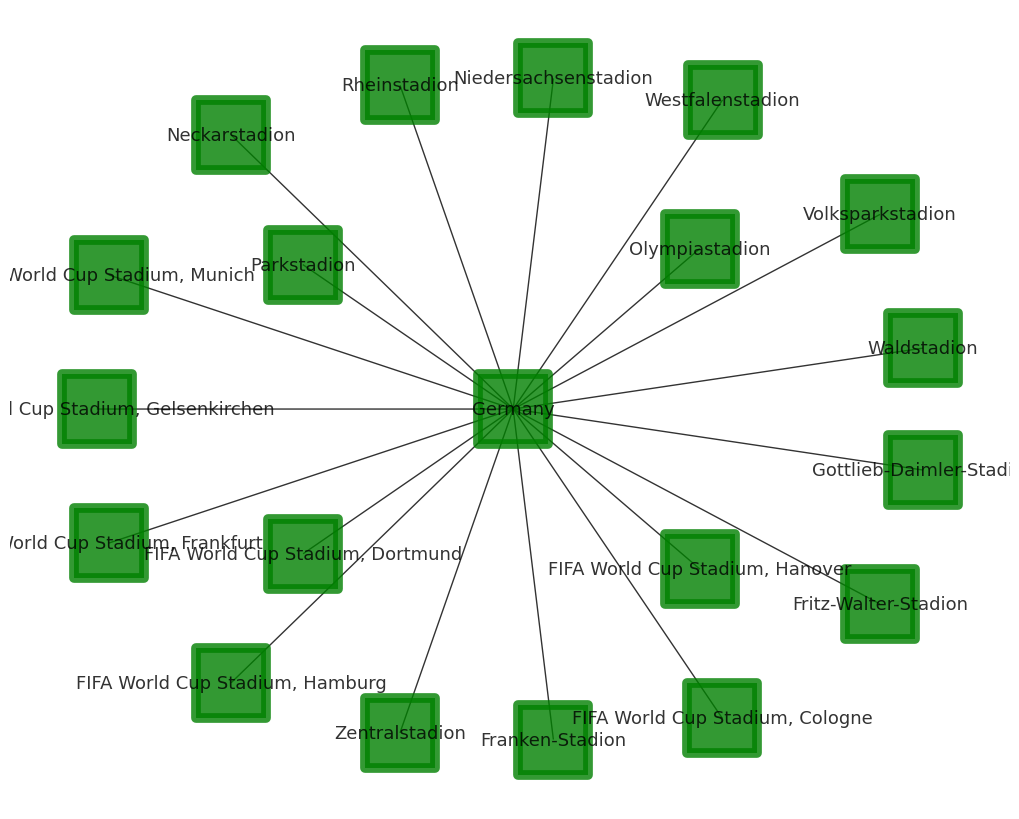

In [437]:
stadium_country("Germany","green")

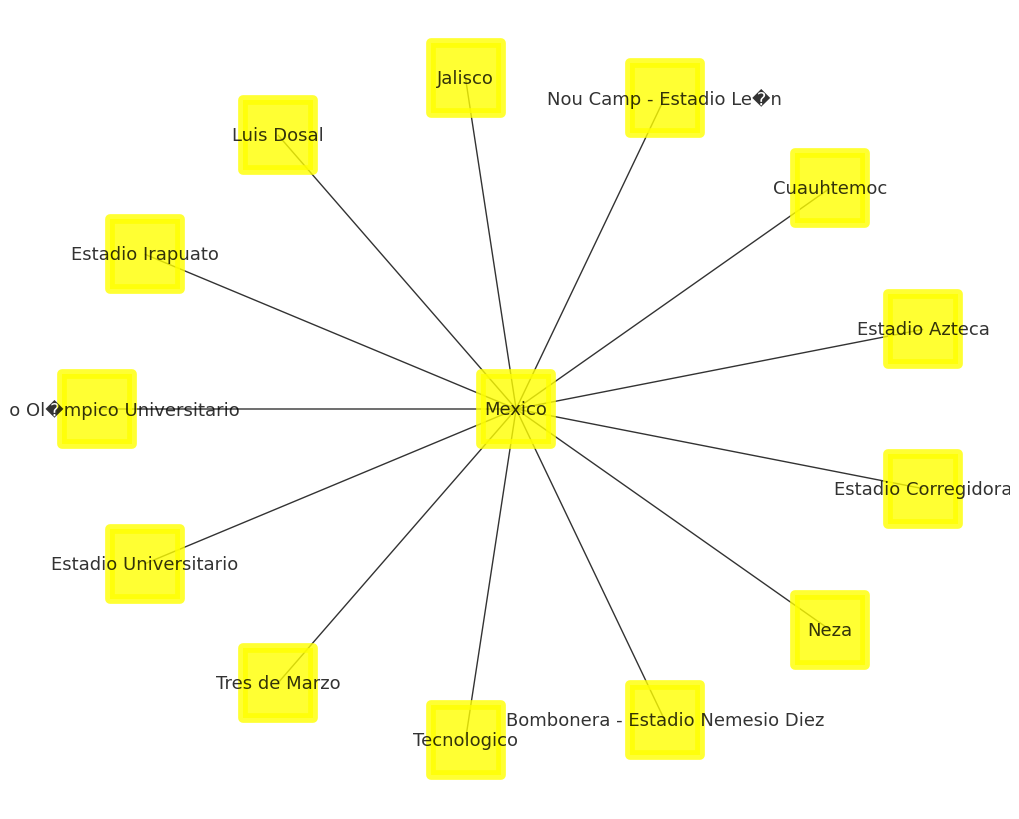

In [438]:
stadium_country("Mexico","yellow")

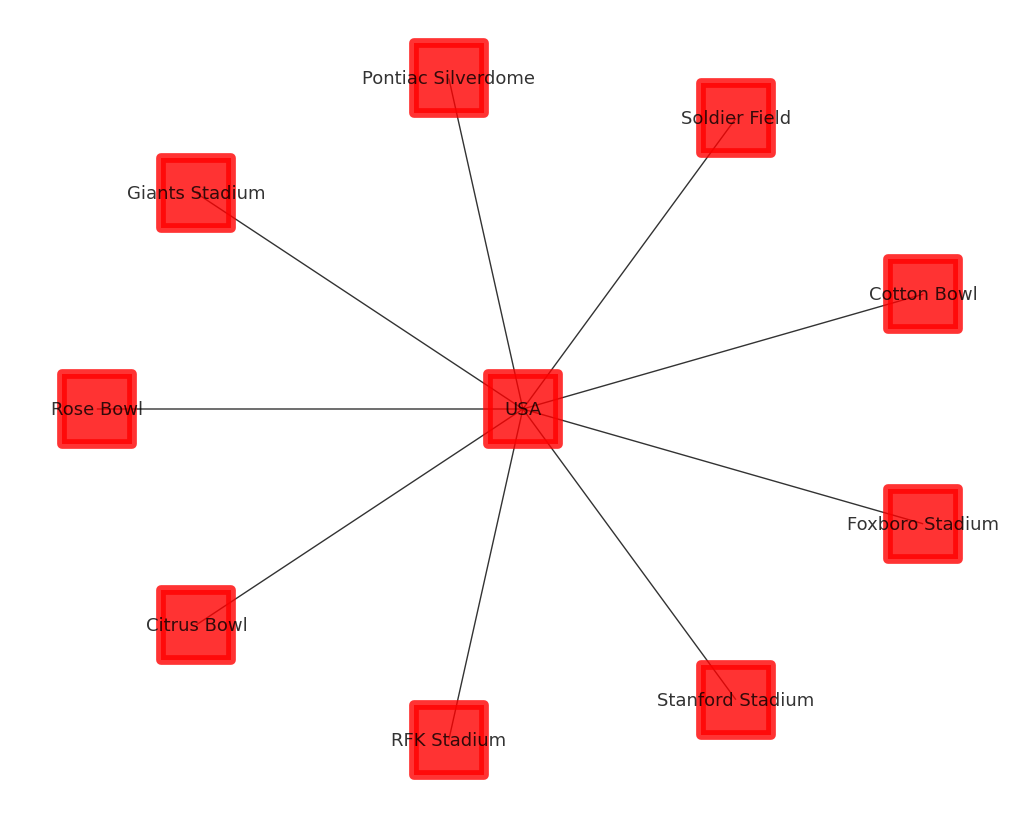

In [439]:
stadium_country("USA","red")

## Over all Analysis



*   According to barchart following national teams are considered to be favorites of World Cup:
  Brazil,Argentina,Germany,Italy, France,Spain,Netherlands,Hungary and Uruguay.
*   Brazil have won World Cup 5 times and footbal appeared in this country, that is why Brazil on the first place.

*   Also, we can see big fluctuation after Brazil and gradualy decreases from Argentina to Uruguay.
*   Next interesting thing that I found that only South American and European countries are considered to be favorites.

*   I have found one thing to consider from this barchart. On the the table goals scored by Germany national team and Germany FR are given sepately.
*   I thought it is because of some historical changes of Germany. So, It will be better to sum data of Germany FR and Germany.

*   I had to find average number of fans who attended the matches by the year. So, on my dataset it shows number of attended fans of every football match by the year.
*   That is why I found mean attendance and marked it on "Y" axis and respectively year on "X" axis.

*   I already did data preparation part for this question by dropping NaN values from table. I need only two columns from the table, there are "Year" and "Attendance" columns.









**Key Findings:**

1.   Top-performing teams, players, and goal-scorers.
2.   Trends in goal distributions and average goals per match.

1.   Impact of playing at home on team performance.
2.   Predictive model for match outcomes.

1.  Analysis of goalkeeper statistics and the influence of coaches.






